In [1]:
import pandas as pd

#importing libraries for plotting
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv('/home/michael/Desktop/corrected_data_questionnaires.tsv', sep='\t')
corr_matrix = pd.read_csv('/home/michael/Desktop/corr_matrix.tsv', sep='\t')
sum_scores= pd.read_csv('/home/michael/Desktop/sum_scores.tsv', sep='\t')
dichtomous_questionnaires_data = pd.read_csv('/home/michael/Desktop/data_dichotomous_questionnaires.tsv',sep='\t')

In [3]:
corr_matrix.columns

Index(['BD Traurigkeit', 'BD Pessimismus', 'BD Versagensgefühle',
       'BD Verlust von Freude', 'BD Schuldgefühle', 'BD Bestrafungsgefühle',
       'BD Selbstablehnung', 'BD Selbstvorwürfe', 'BD Selbstmordgedanken',
       'BD Weinen',
       ...
       'MAE: Bei Versammlungen überlasse ich das Reden gewöhnlich anderen.',
       'MAE: Ich fordere mich selbst bis an meine Grenzen.',
       'MAE: Ich bin dominant, selbstsicher und durchsetzungsfähig.',
       'MAE: Ich bin kein gutgelaunter Optimist.',
       'MAE: Wenn ein Vorhaben sich als zu schwierig erweist, neige ich dazu, etwas neues anzufangen.',
       'MAE: Ich habe Spaß an fast allem, was ich tue.',
       'MAE: Bei Unterhaltungen rede ich selbst am meisten.',
       'MAE: Bei allem, was ich tue, strebe ich nach Perfektion.',
       'MAE: Ich finde, dass es sehr leicht ist, das Leben zu genießen.',
       'MAE: Ich kann Leute sehr gut beeinflussen.'],
      dtype='object', length=240)

In [4]:
sum_scores_corr_matrix = sum_scores.corr(method='spearman')

In [5]:
sp_columns =  []


for i in range(len((corr_matrix.columns[corr_matrix.columns.str.contains('SPS')]))):
    #print(i)
    sp_column_name = corr_matrix.columns[corr_matrix.columns.str.contains('SPS')][i]
    #print(bdi_column_name)
    sp_columns.append(sp_column_name)
    

index_sp_columns = []

for i in range(len(corr_matrix.columns)):
    for j in range(len(sp_columns)):
        if corr_matrix.columns[i] == sp_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_sp_columns.append(i)
        #else:
            #print('no')

#sp_data = corr_matrix.iloc[:, index_sp_columns[0]:(index_sp_columns[-1] +1)]
index_sp_columns

[46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65]

In [6]:
corr_matrix = corr_matrix.iloc[:66,:66]

In [7]:
corr_matrix.columns

Index(['BD Traurigkeit', 'BD Pessimismus', 'BD Versagensgefühle',
       'BD Verlust von Freude', 'BD Schuldgefühle', 'BD Bestrafungsgefühle',
       'BD Selbstablehnung', 'BD Selbstvorwürfe', 'BD Selbstmordgedanken',
       'BD Weinen', 'BD Unruhe', 'BD Interessenverlust',
       'BD Entschlussunfähigkeit', 'BD Wertlosigkeit', 'BD Energieverlust',
       'BD Veränderung der Schlafgewohnheiten', 'BD Reizbarkeit',
       'BD Veränderung des Appetits', 'BD Konzentrationsschwierigkeiten',
       'BD Ermüdung und Erschöpfung', 'BD Verlust an sexuellem Interesse',
       'DES: ... werde ich hilflos im Umgang mit meinen Gefühlen sein.',
       'DES: ... wird es mir helfen, wenn ich Dinge tue, die mir gewöhnlich Spaß machen.',
       'DES: ... werde ich meine Stimmung beeinflussen können.',
       'DES: ... wird es mir gut tun, wenn ich mich körperlich schone.',
       'DES: ... werde ich mich besser fühlen, wenn ich mit jemandem über meine Probleme rede.',
       'DES: ... werde ich es nicht

In [8]:
# select only relevant data
sum_scores_corr_matrix = sum_scores_corr_matrix.iloc[:3, :3]
sum_scores_corr_matrix

bdi_sum_score  des_sum_score  sp_sum_score
bdi_sum_score       1.000000       0.321662      0.426464
des_sum_score       0.321662       1.000000      0.386433
sp_sum_score        0.426464       0.386433      1.000000

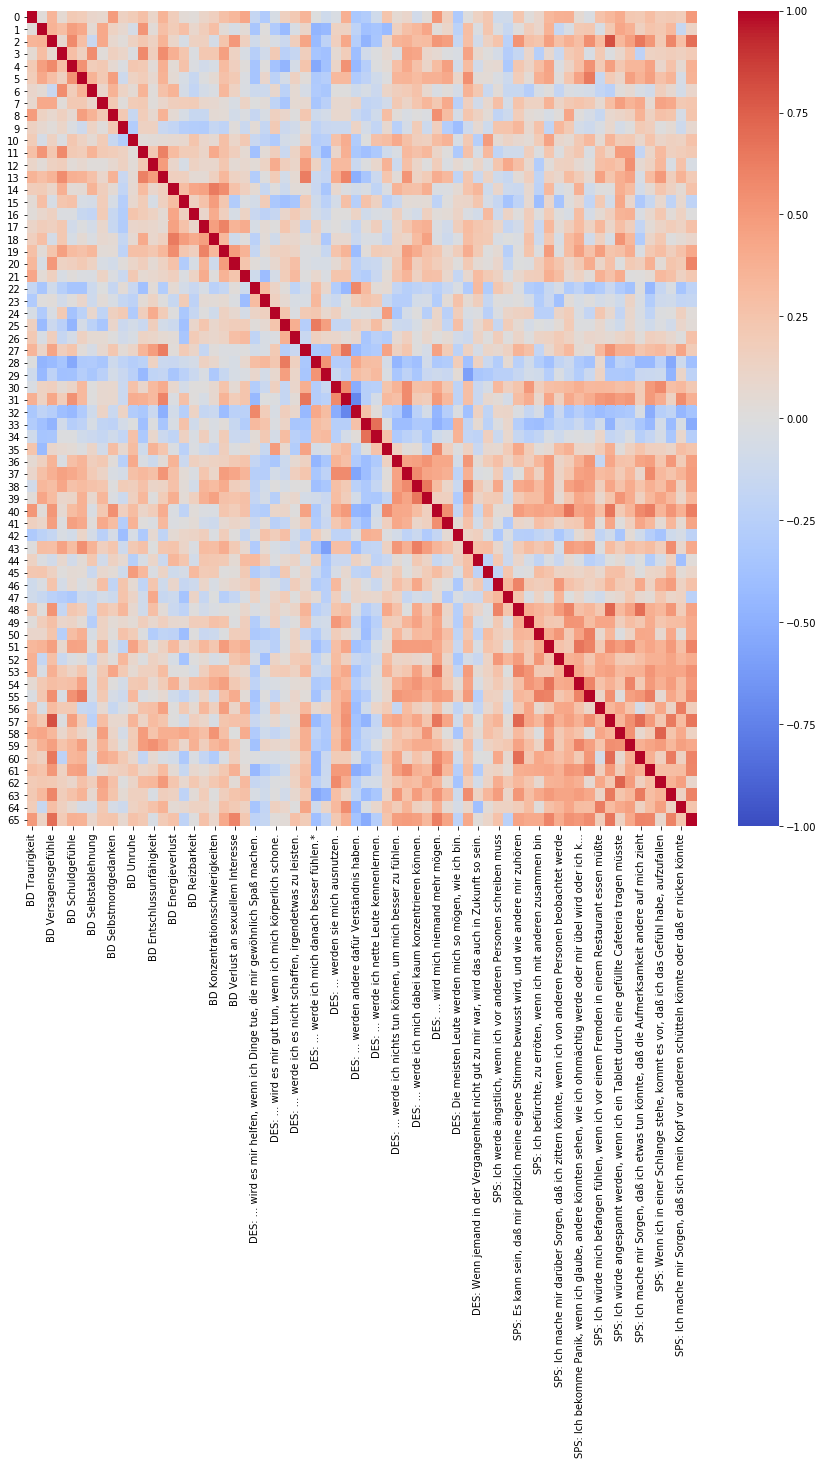

In [9]:

plt.figure(figsize=(15,15))
sns_plot = sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1,vmax=1,center=0)
#sns_plot.figure.savefig("/home/michael/Desktop/output.png", dpi=300, bbox_inches='tight')

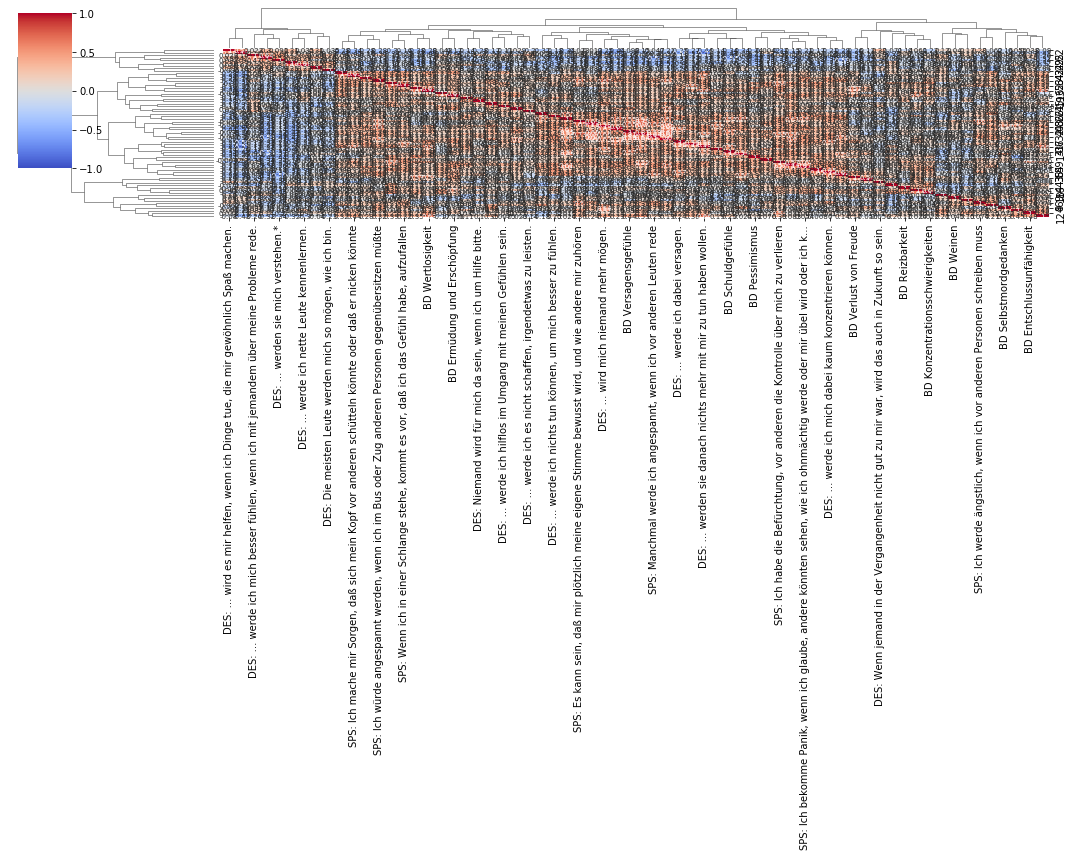

In [10]:
sns.clustermap(corr_matrix, method="complete", cmap='coolwarm', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));

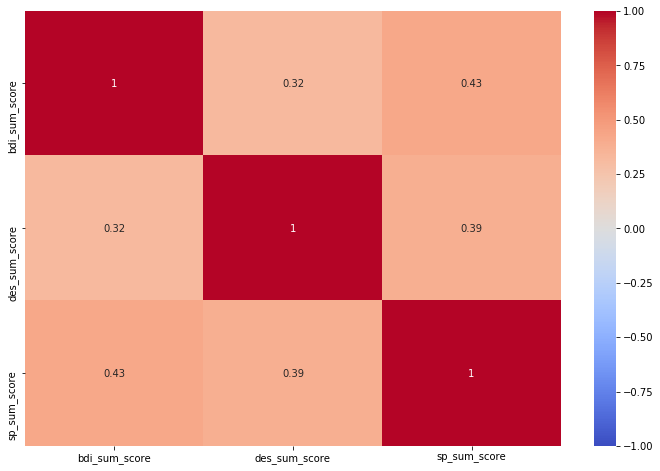

In [11]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(sum_scores_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
sns_plot.figure.savefig("/home/michael/Desktop/sum_scores_corr.png", dpi=300, bbox_inches='tight')

In [12]:
sum_scores_corr_matrix

bdi_sum_score  des_sum_score  sp_sum_score
bdi_sum_score       1.000000       0.321662      0.426464
des_sum_score       0.321662       1.000000      0.386433
sp_sum_score        0.426464       0.386433      1.000000

<Figure size 1080x720 with 0 Axes>

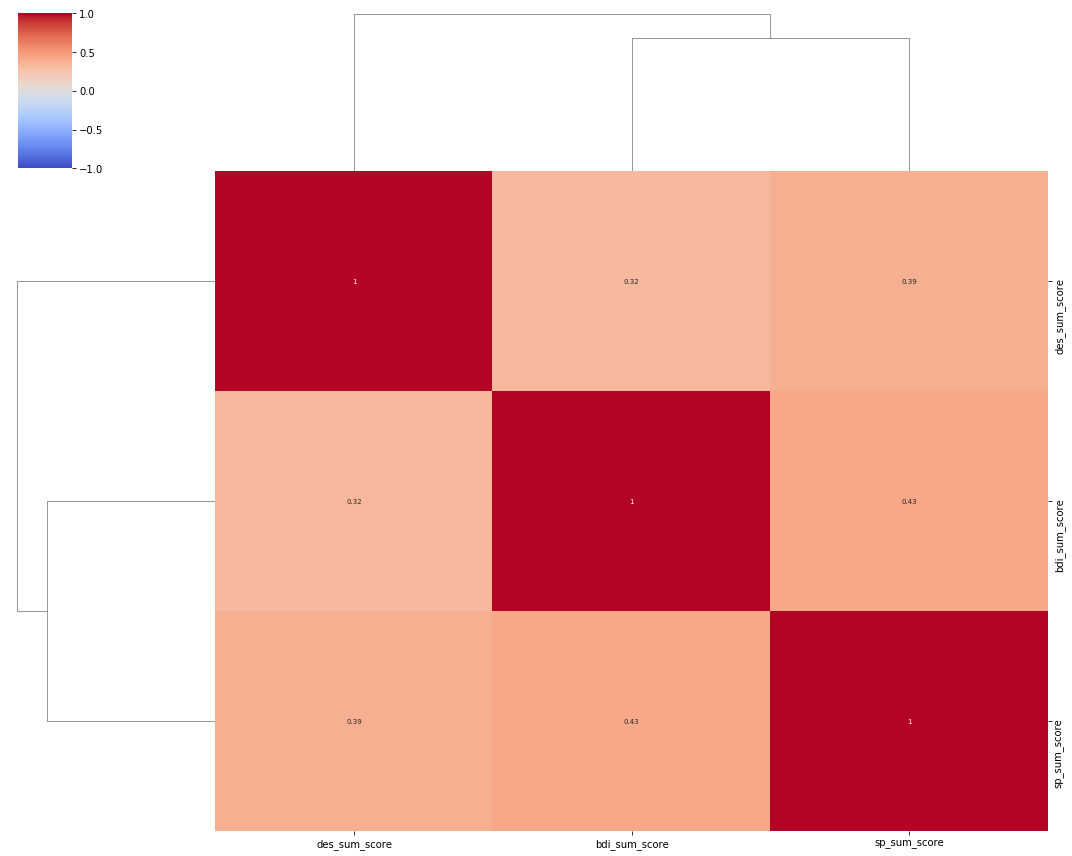

In [13]:
plt.figure(figsize=(15,10))

sns_plot = sns.clustermap(sum_scores_corr_matrix, method="complete", cmap='coolwarm', annot=True, 
               annot_kws={"size": 7}, vmin=-1,vmax=1,center=0, figsize=(15,12));
sns_plot.savefig("/home/michael/Desktop/sum_scores_corr_clustermap.png", dpi=300, bbox_inches='tight')

In [14]:
sum_scores.describe()

bdi_sum_score  des_sum_score  sp_sum_score  neo-extraversion_sum_score  \
count      36.000000      36.000000     36.000000                   36.000000   
mean        6.333333      66.388889     11.666667                  105.444444   
std         4.672106       5.200427      9.887944                    7.861096   
min         0.000000      50.000000      0.000000                   87.000000   
25%         3.000000      64.000000      4.000000                  101.250000   
50%         6.000000      66.000000     10.000000                  105.500000   
75%         8.000000      70.000000     15.000000                  112.000000   
max        21.000000      78.000000     41.000000                  120.000000   

       neo-neuroticism_sum_score  neo-aggreeablness_sum_score  mae_sum_score  
count                  36.000000                    36.000000      36.000000  
mean                   94.694444                   106.194444    1356.833333  
std                    11.999570                    10.039406    5399.957791  
min                    74.000000                    88.000000      45.000000  
25%                    85.000000                   100.000000      60.000000  
50%                    94.000000                   105.500000      66.500000  
75%                   103.250000                   111.000000      72.000000  
max                   122.000000                   133.000000   23310.000000

## Plot sum scores pro questionnaire

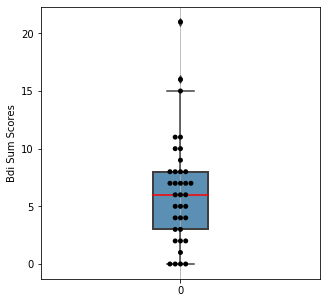

In [15]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['bdi_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['bdi_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Bdi Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/bdi_sums_output.png", dpi=300, bbox_inches='tight')

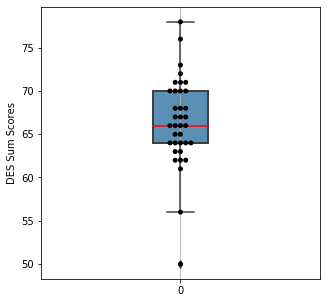

In [16]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['des_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['des_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="DES Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/des_sums_output.png", dpi=300, bbox_inches='tight')

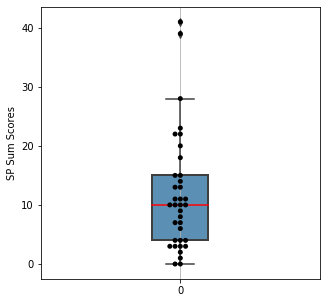

In [17]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['sp_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['sp_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="SP Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/sps_sums_output.png", dpi=300, bbox_inches='tight')

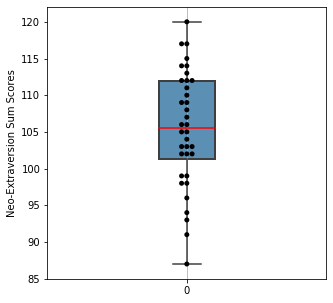

In [18]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['neo-extraversion_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['neo-extraversion_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Neo-Extraversion Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/ne_sums_output.png", dpi=300, bbox_inches='tight')

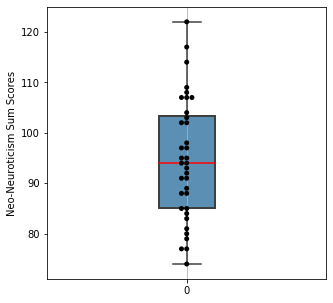

In [19]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['neo-neuroticism_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['neo-neuroticism_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Neo-Neuroticism Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/nn_sums_output.png", dpi=300, bbox_inches='tight')

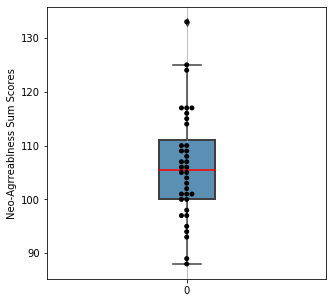

In [20]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['neo-aggreeablness_sum_score'], 
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['neo-aggreeablness_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Neo-Agrreablness Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/na_sums_output.png", dpi=300, bbox_inches='tight')

## Plot Results by single items per questionnaire

## BDI-II

In [21]:
# Get Values for BDI-II
bdi_columns =  []
for i in range(len((data.columns[data.columns.str.contains('BD ')]))):
    #print(i)
    bdi_column_name = data.columns[data.columns.str.contains('BD ')][i]
    #print(bdi_column_name)
    bdi_columns.append(bdi_column_name)

index_bdi_columns = []

for i in range(len(data.columns)):
    for j in range(len(bdi_columns)):
        if data.columns[i] == bdi_columns[j]:
            index_bdi_columns.append(i)

bdi_data = data.iloc[:, index_bdi_columns[0]:(index_bdi_columns[-1] +1)]

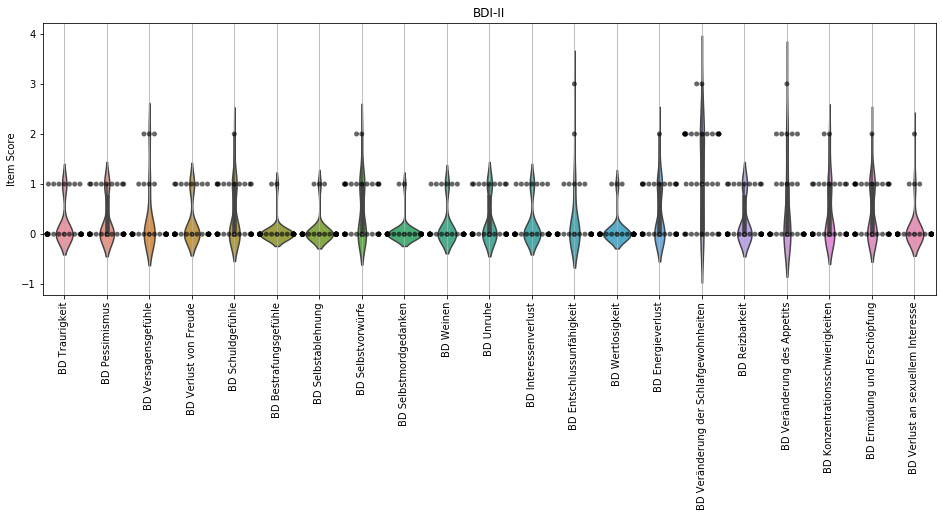

In [22]:
# Initialize figure 
f, ax = plt.subplots(figsize=(16, 5))

# Boxplot bdi
sns.violinplot(data=bdi_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=bdi_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(ylabel="Item Score")
ax.set_title('BDI-II')
f.savefig("/home/michael/Desktop/bdi_item_scores_output.png", dpi=300, bbox_inches='tight')

## DES - depressive expectation scale

In [23]:
# Get Values for DES
des_columns =  []
for i in range(len((data.columns[data.columns.str.contains('DE')]))):
    #print(i)
    des_column_name = data.columns[data.columns.str.contains('DE')][i]
    #print(bdi_column_name)
    des_columns.append(des_column_name)


index_des_columns = []

for i in range(len(data.columns)):
    for j in range(len(des_columns)):
        if data.columns[i] == des_columns[j]:
            index_des_columns.append(i)


des_data = data.iloc[:, index_des_columns[0]:(index_des_columns[-1] +1)]


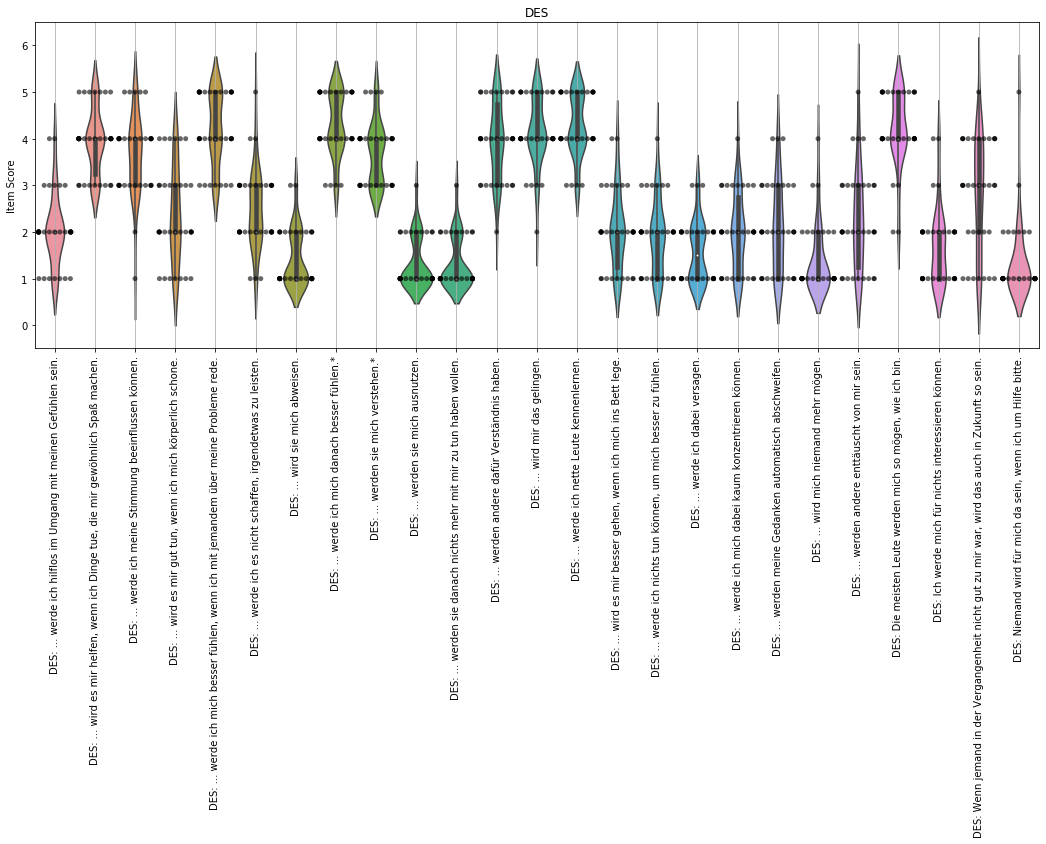

In [24]:
# Initialize figure 
f, ax = plt.subplots(figsize=(18, 6))

# Boxplot bdi
sns.violinplot(data=des_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=des_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('DES')
f.savefig("/home/michael/Desktop/des_item_scores_output.png", dpi=300, bbox_inches='tight')

## SPS - social phobia scale

In [25]:

sp_columns =  []
for i in range(len((data.columns[data.columns.str.contains('SPS')]))):
    #print(i)
    sp_column_name = data.columns[data.columns.str.contains('SPS')][i]
    #print(bdi_column_name)
    sp_columns.append(sp_column_name)
    


index_sp_columns = []

for i in range(len(data.columns)):
    for j in range(len(sp_columns)):
        if data.columns[i] == sp_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_sp_columns.append(i)
        #else:
            #print('no')

sp_data = data.iloc[:, index_sp_columns[0]:(index_sp_columns[-1] +1)]

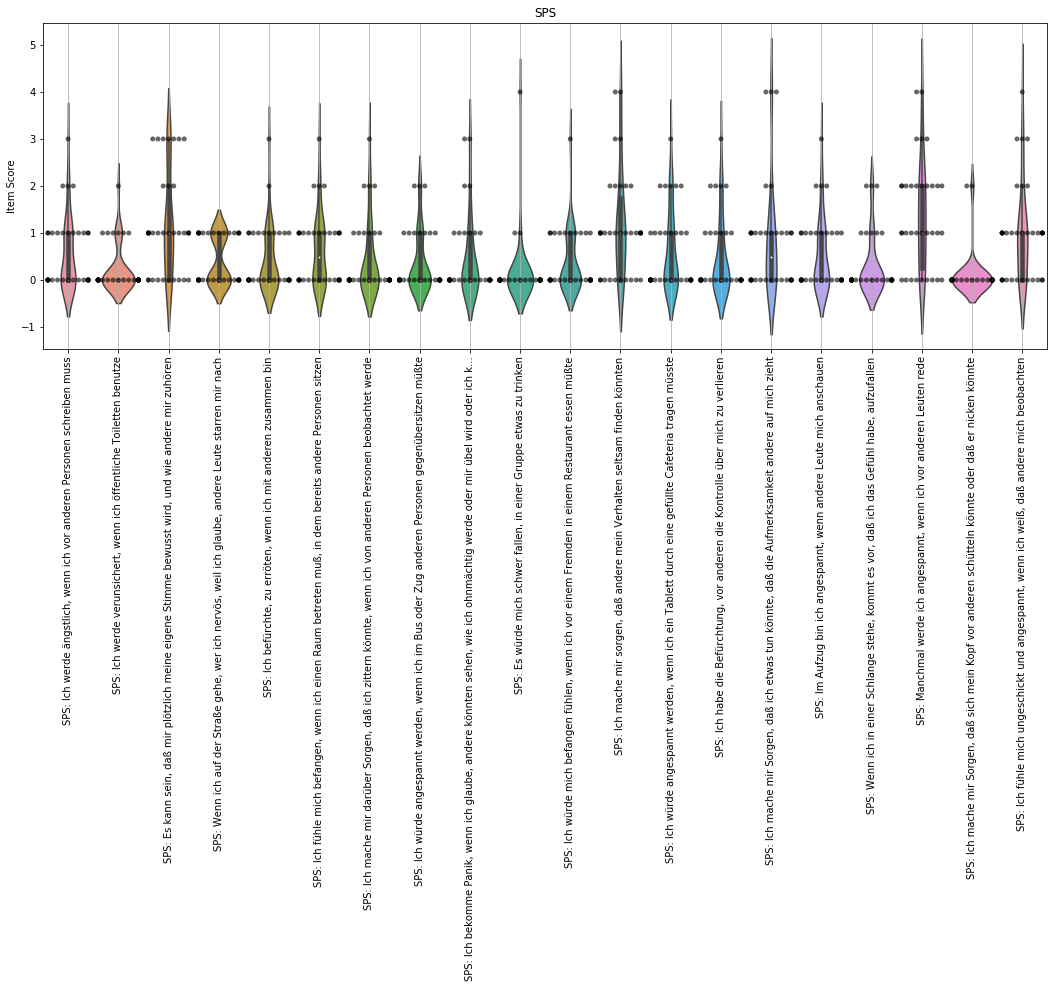

In [26]:
# Initialize figure 
f, ax = plt.subplots(figsize=(18, 6))

# Boxplot bdi
sns.violinplot(data=sp_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=sp_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('SPS')
f.savefig("/home/michael/Desktop/sps_item_scores_output.png", dpi=300, bbox_inches='tight')

## NEO-PI-R Extraversion

In [27]:
ne_columns =  []
for i in range(len((data.columns[data.columns.str.contains('NE')]))):
    #print(i)
    ne_column_name = data.columns[data.columns.str.contains('NE')][i]
    #print(bdi_column_name)
    ne_columns.append(ne_column_name)
    

index_ne_columns = []

for i in range(len(data.columns)):
    for j in range(len(ne_columns)):
        if data.columns[i] == ne_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_ne_columns.append(i)
        #else:
            #print('no')

ne_data = data.iloc[:, index_ne_columns[0]:(index_ne_columns[-1] +1)]

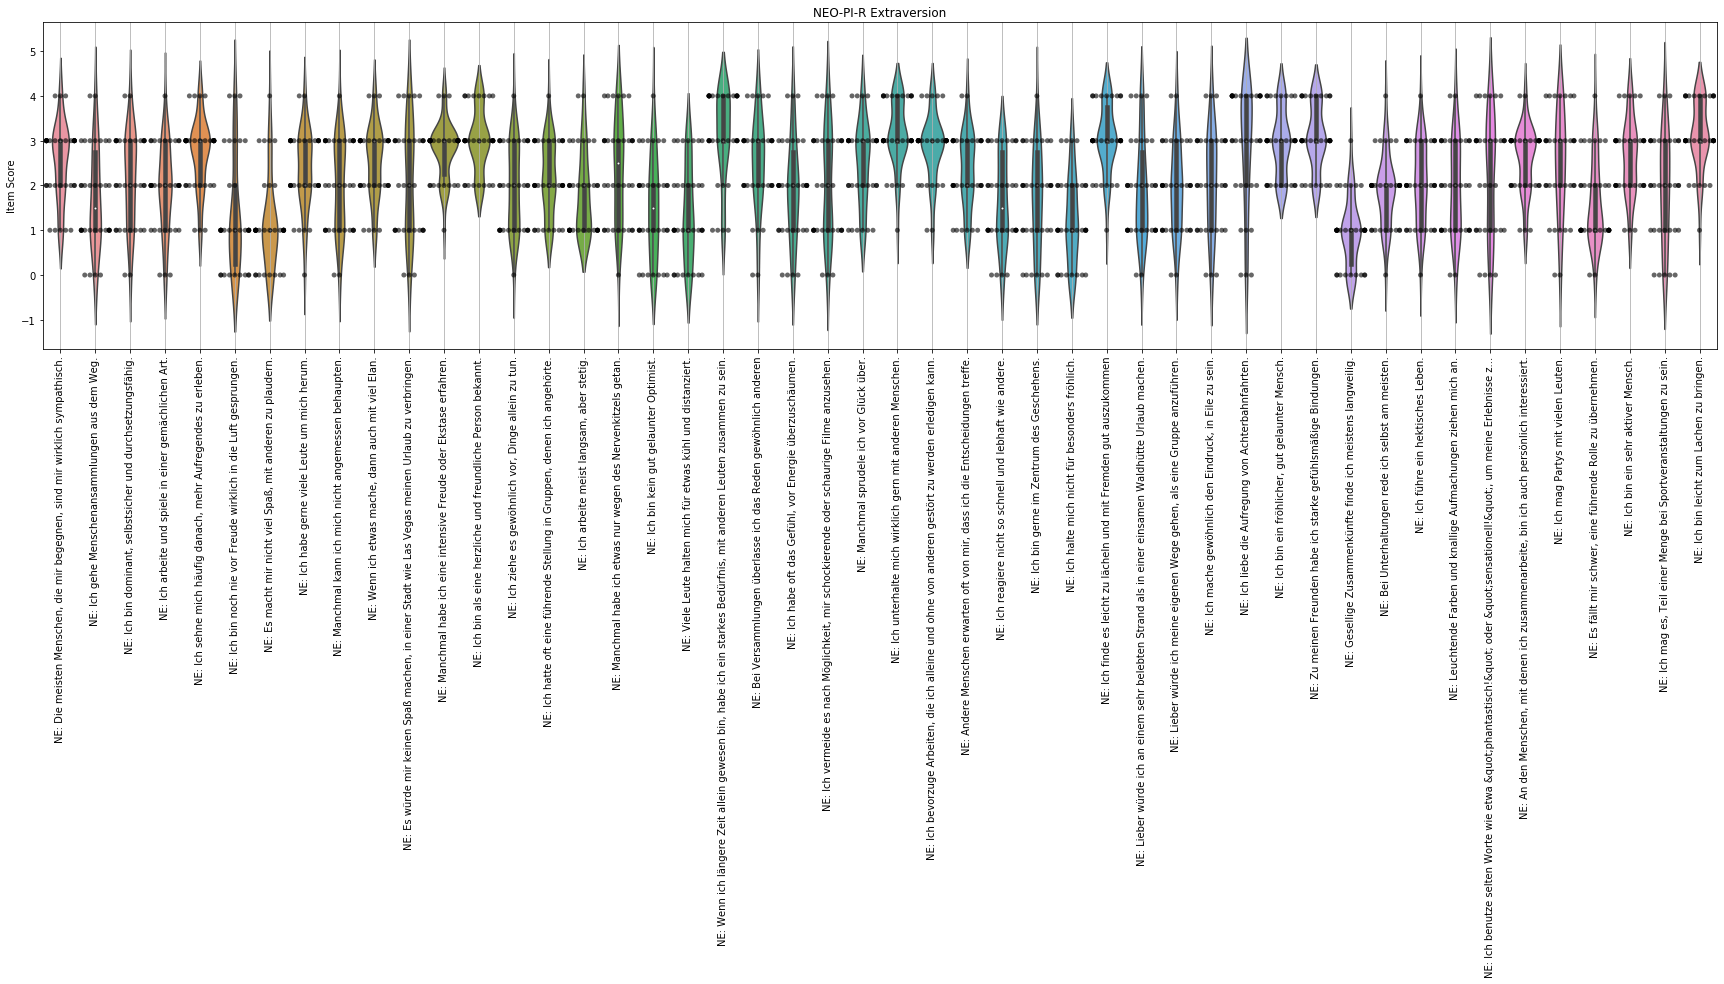

In [28]:
# Initialize figure 
f, ax = plt.subplots(figsize=(30, 6))

# Boxplot bdi
sns.violinplot(data=ne_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=ne_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('NEO-PI-R Extraversion')
f.savefig("/home/michael/Desktop/ne_item_scores_output.png", dpi=300, bbox_inches='tight')

## NEO-PI-R Neuroticism

In [29]:
nn_columns =  []
for i in range(len((data.columns[data.columns.str.contains('NN')]))):
    #print(i)
    nn_column_name = data.columns[data.columns.str.contains('NN')][i]
    #print(bdi_column_name)
    nn_columns.append(nn_column_name)
    
index_nn_columns = []

for i in range(len(data.columns)):
    for j in range(len(nn_columns)):
        if data.columns[i] == nn_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_nn_columns.append(i)
        #else:
            #print('no')

nn_data = data.iloc[:, index_nn_columns[0]:(index_nn_columns[-1] +1)]


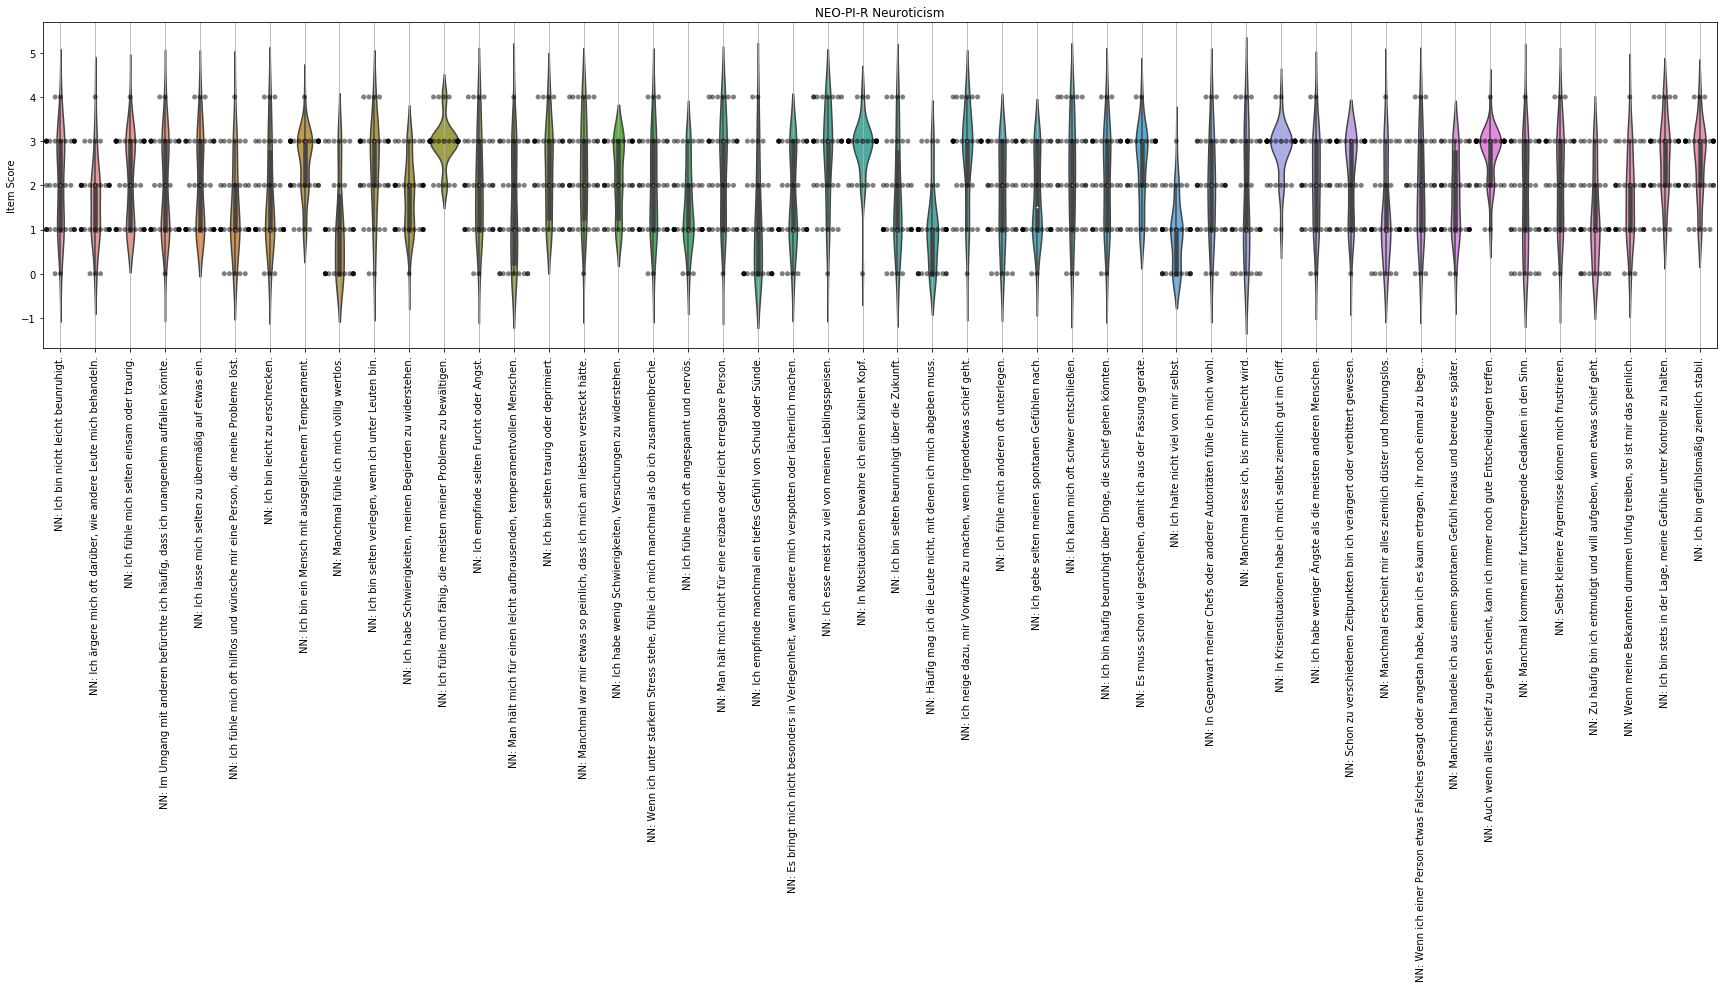

In [30]:
# Initialize figure 
f, ax = plt.subplots(figsize=(30, 6))

# Boxplot bdi
sns.violinplot(data=nn_data, 
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=nn_data, color="black", alpha=0.5)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('NEO-PI-R Neuroticism')

f.savefig("/home/michael/Desktop/nn_item_scores_output.png", dpi=300, bbox_inches='tight')

## NEO-PI-R Agrreableness

In [31]:
na_columns =  []
for i in range(len((data.columns[data.columns.str.contains('NA')]))):
    #print(i)
    na_column_name = data.columns[data.columns.str.contains('NA')][i]
    #print(bdi_column_name)
    na_columns.append(na_column_name)
    
index_na_columns = []

for i in range(len(data.columns)):
    for j in range(len(na_columns)):
        if data.columns[i] == na_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_na_columns.append(i)
        #else:
            #print('no')

na_data = data.iloc[:, index_na_columns[0]:(index_na_columns[-1] +1)]

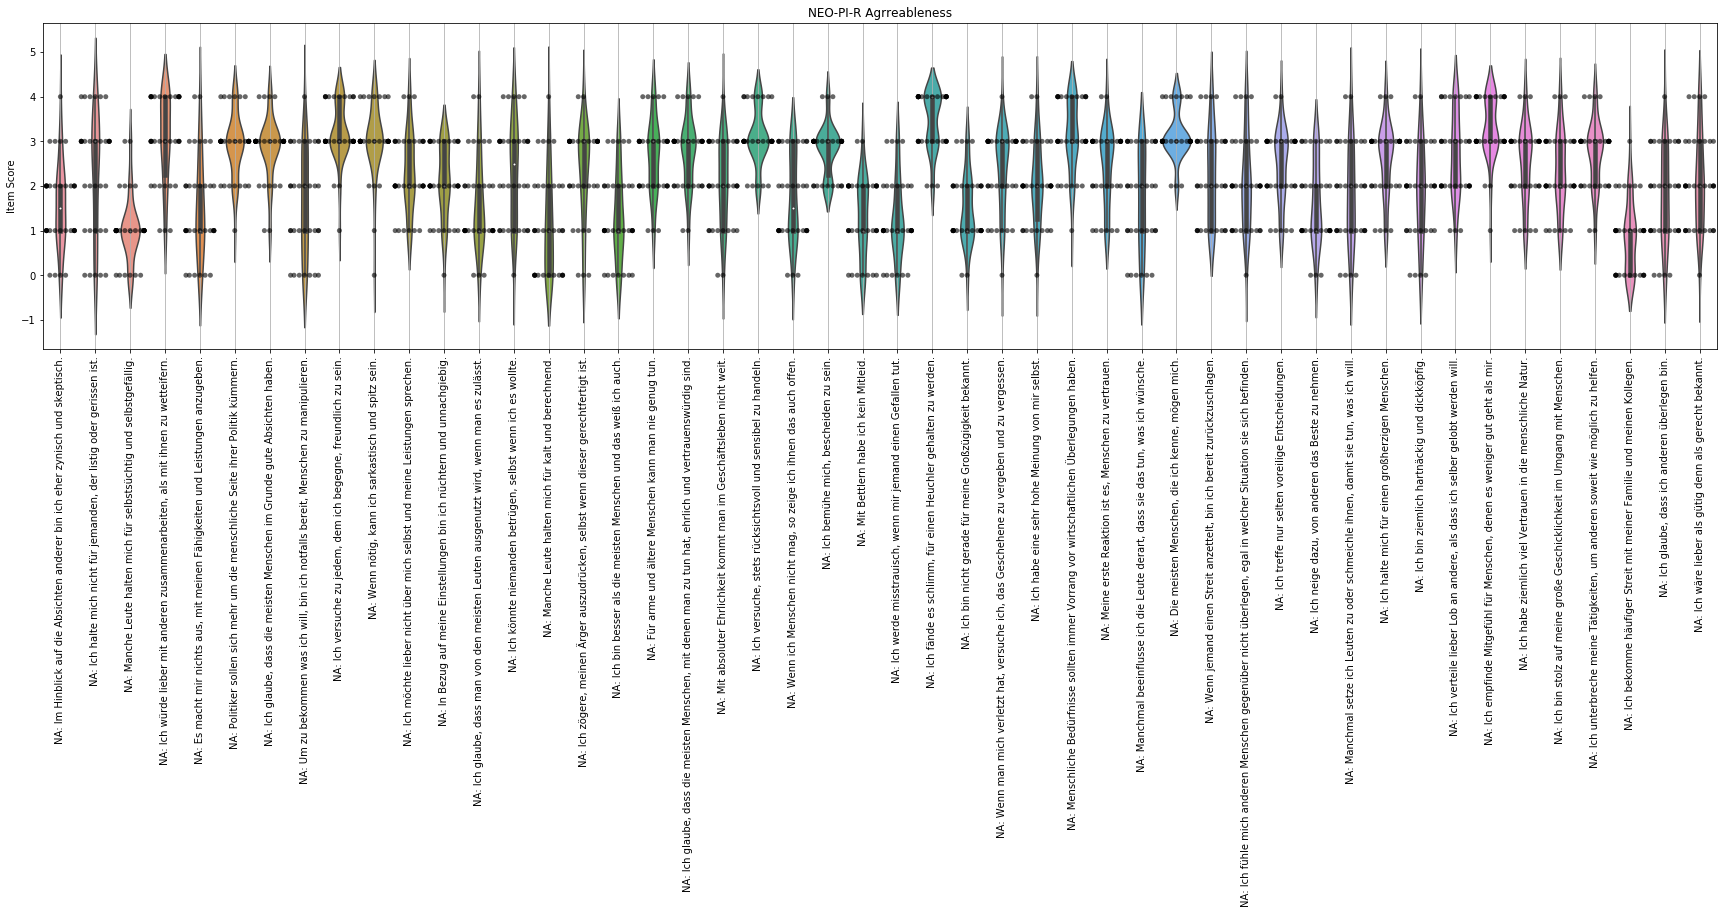

In [32]:
# Initialize figure 
f, ax = plt.subplots(figsize=(30, 6))

# Boxplot bdi
sns.violinplot(data=na_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=na_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('NEO-PI-R Agrreableness')
f.savefig("/home/michael/Desktop/na_item_scores_output.png", dpi=300, bbox_inches='tight')

## MAE - agentic extraversion

In [33]:
mae_columns =  []
for i in range(len((data.columns[data.columns.str.contains('MAE')]))):
    #print(i)
    mae_column_name = data.columns[data.columns.str.contains('MAE')][i]
    #print(bdi_column_name)
    mae_columns.append(mae_column_name)
    
index_mae_columns = []

for i in range(len(data.columns)):
    for j in range(len(mae_columns)):
        if data.columns[i] == mae_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_mae_columns.append(i)
        #else:
            #print('no')

mae_data = data.iloc[:, index_mae_columns[0]:(index_mae_columns[-1] +1)]

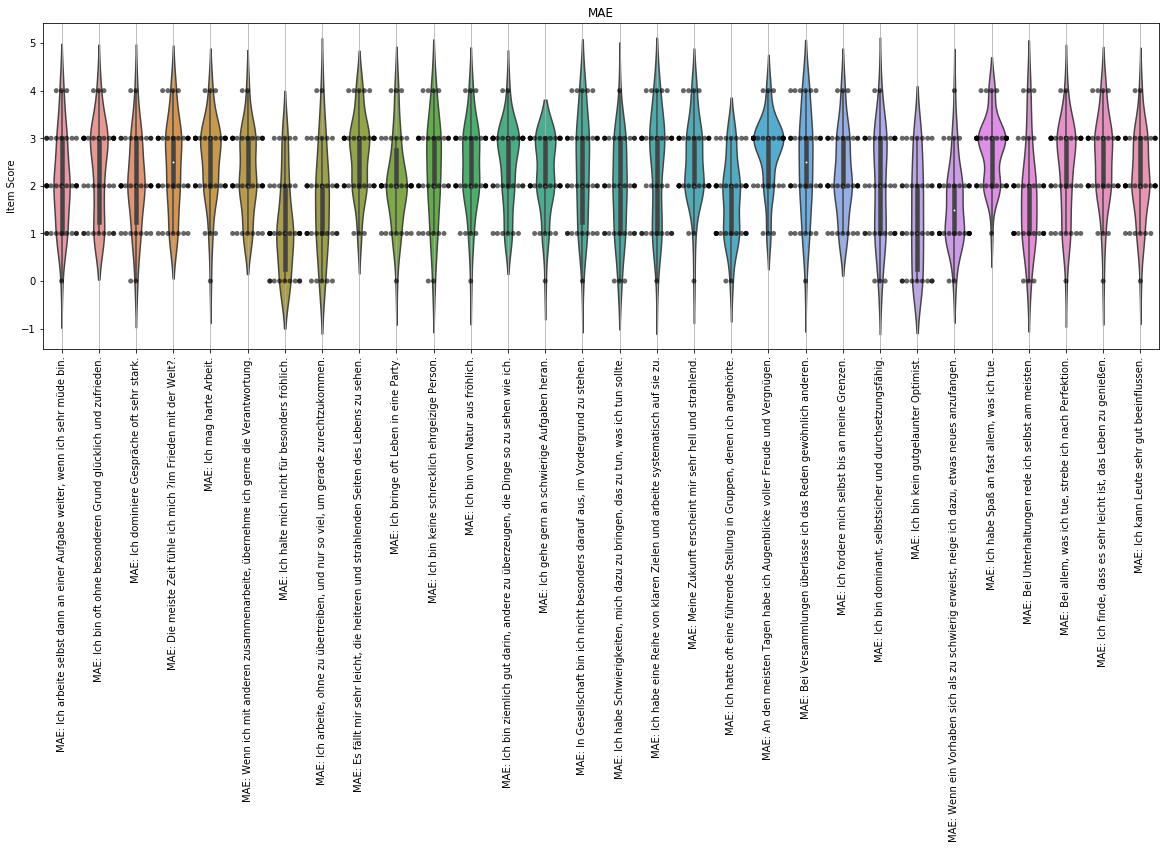

In [34]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

# Boxplot bdi
sns.violinplot(data=mae_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=mae_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('MAE')
f.savefig("/home/michael/Desktop/mae_item_scores_output.png", dpi=300, bbox_inches='tight')

## MPQ-Social-closeness

In [35]:
# Get Values for MPQ-Social-closeness
# 1 = True; 2 = False

mpq_columns =  []
for i in range(len((dichtomous_questionnaires_data.columns[dichtomous_questionnaires_data.columns.str.contains('MPQ')]))):
    #print(i)
    mpq_column_name = dichtomous_questionnaires_data.columns[dichtomous_questionnaires_data.columns.str.contains('MPQ')][i]
    #print(bdi_column_name)
    mpq_columns.append(mpq_column_name)
    
index_mpq_columns = []

for i in range(len(dichtomous_questionnaires_data.columns)):
    for j in range(len(mpq_columns)):
        if dichtomous_questionnaires_data.columns[i] == mpq_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mpq_columns.append(i)
        #else:
            #print('no')

mpq_data = dichtomous_questionnaires_data.iloc[:, index_mpq_columns[0]:(index_mpq_columns[-1] +1)]

In [36]:
len(mpq_data.columns)

21

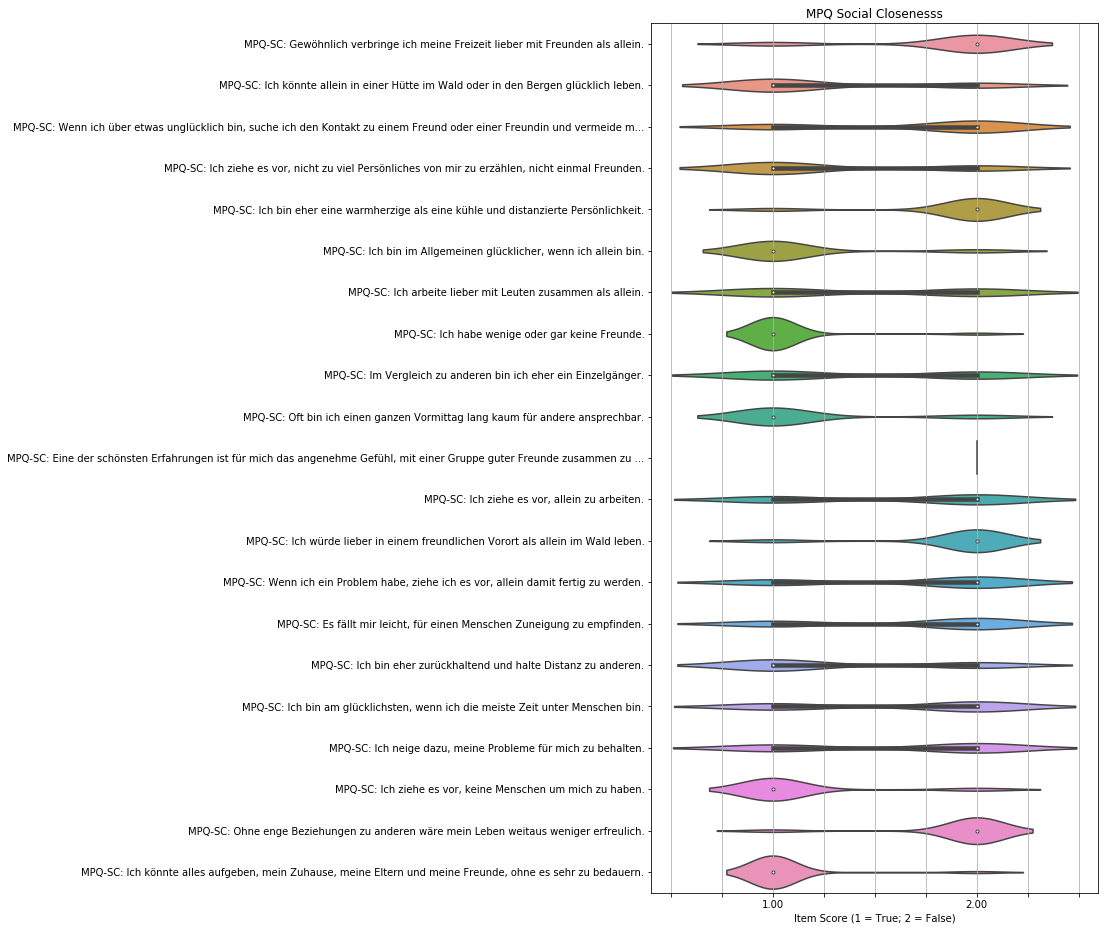

In [37]:
# Initialize figure 
f, ax = plt.subplots(figsize=(8, 16))

# single observations
sns.violinplot(data=mpq_data, alpha=0.6, orient='h')
#sns.swarmplot(data=mpq_data, color="black", alpha=0.6, orient='h')


# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(xlabel="Item Score (1 = True; 2 = False)")
ax.yaxis.labelpad = 25
ax.set_title('MPQ Social Closenesss')

for ind, label in enumerate(ax.get_xticklabels()):
        if ind == 3:
            label.set_visible(True)
        elif ind == 7:
            label.set_visible(True)
        else:
            label.set_visible(False)

f.savefig("/home/michael/Desktop/mpq_item_scores_output.png", dpi=300, bbox_inches='tight')

## SES-17

In [38]:
# Get Values for SES-17
# 1 = True; 2 = False
ses_columns =  []
for i in range(len((dichtomous_questionnaires_data.columns[dichtomous_questionnaires_data.columns.str.contains('SES')]))):
    #print(i)
    ses_column_name = dichtomous_questionnaires_data.columns[dichtomous_questionnaires_data.columns.str.contains('SES')][i]
    #print(bdi_column_name)
    ses_columns.append(ses_column_name)
    
index_ses_columns = []

for i in range(len(dichtomous_questionnaires_data.columns)):
    for j in range(len(ses_columns)):
        if dichtomous_questionnaires_data.columns[i] == ses_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_ses_columns.append(i)
        #else:
            #print('no')

ses_data = dichtomous_questionnaires_data.iloc[:, index_ses_columns[0]:(index_ses_columns[-1] +1)]


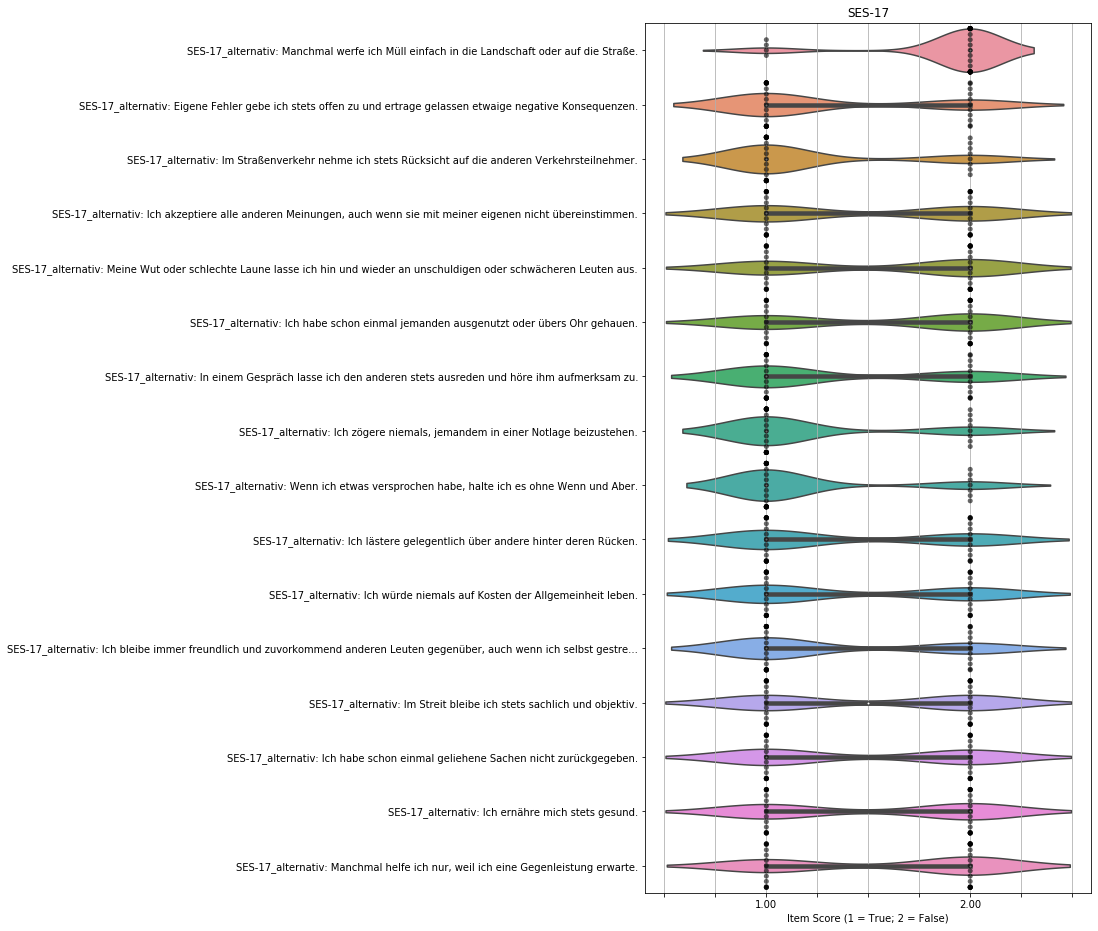

In [39]:
# Initialize figure 
f, ax = plt.subplots(figsize=(8, 16))

# single observations
sns.violinplot(data=ses_data, orient="h")
sns.swarmplot(data=ses_data, color="black", alpha=0.6, orient='h')

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels())
ax.set(xlabel="Item Score (1 = True; 2 = False)")
ax.set_title('SES-17')
for ind, label in enumerate(ax.get_xticklabels()):
        if ind == 3:
            label.set_visible(True)
        elif ind == 7:
            label.set_visible(True)
        else:
            label.set_visible(False)

f.savefig("/home/michael/Desktop/ses_item_scores_output.png", dpi=300, bbox_inches='tight')

## Prepare mood data

In [40]:
mood_data_1 = pd.read_csv('/home/michael/master_thesis/stimmunngabfrage/mood_ern_sample_1.tsv', sep='\t')
mood_data_2 = pd.read_csv('/home/michael/master_thesis/stimmunngabfrage/mood_ern_sample_2.tsv', sep='\t')

In [41]:
# 10 == baseline condition
# 20 == negtaive condition
# 30 == positive condition
mood_data_1

Code  Wie stark sind die Gefühle Erfolg und Stolz vorhanden?  \
0   1002                                                  4        
1   2002                                                  4        
2   3002                                                  6        
3   1003                                                  7        
4   2003                                                  5        
..   ...                                                ...        
76  2027                                                  3        
77  3027                                                  3        
78  1028                                                  5        
79  2028                                                  8        
80  3028                                                  8        

    Wie stark fühlen Sie sich niedergeschlagen, bedrückt, betrübt und traurig?  \
0                                                   5                            
1                                                   4                            
2                                                   5                            
3                                                   2                            
4                                                   4                            
..                                                ...                            
76                                                  3                            
77                                                  1                            
78                                                  6                            
79                                                  3                            
80                                                  2                            

    Wie stark sind die Gefühle Wärme und Zuneigung vorhanden?  \
0                                                   6           
1                                                   5           
2                                                   4           
3                                                   6           
4                                                   5           
..                                                ...           
76                                                  3           
77                                                  4           
78                                                  5           
79                                                  6           
80                                                  7           

    Wie stark sind die Gefühle Frustration und Enttäuschung vorhanden?  \
0                                                   4                    
1                                                   4                    
2                                                   4                    
3                                                   1                    
4                                                   6                    
..                                                ...                    
76                                                  3                    
77                                                  2                    
78                                                  2                    
79                                                  1                    
80                                                  2                    

    Wie stark fühlen Sie sich fröhlich, freudig, vergnügt und entzückt?  \
0                                                   4                     
1                                                   5                     
2                                                   5                     
3                                                   6                     
4                                                   5                     
..                                                ...                     
76     

In [42]:

mood_data_2_columns =  []
for i in range(len((mood_data_2.columns[mood_data_2.columns.str.contains('Baseline_')]))):
    #print(i)
    mood_data_2_column_name = mood_data_2.columns[mood_data_2.columns.str.contains('Baseline_')][i]
    #print(bdi_column_name)
    mood_data_2_columns.append(mood_data_2_column_name)
    
index_mood_data_2_columns = []

for i in range(len(mood_data_2.columns)):
    for j in range(len(mood_data_2_columns)):
        if mood_data_2.columns[i] == mood_data_2_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mood_data_2_columns.append(i)
        #else:
            #print('no')

mood_data_2_baseline = mood_data_2.iloc[:, index_mood_data_2_columns[0]:(index_mood_data_2_columns[-1] +1)]

In [43]:
# split dataframe by column name
mood_data_2_columns =  []
for i in range(len((mood_data_2.columns[mood_data_2.columns.str.contains('Baseline_')]))):
    #print(i)
    mood_data_2_column_name = mood_data_2.columns[mood_data_2.columns.str.contains('Baseline_')][i]
    #print(bdi_column_name)
    mood_data_2_columns.append(mood_data_2_column_name)
    
index_mood_data_2_columns = []

for i in range(len(mood_data_2.columns)):
    for j in range(len(mood_data_2_columns)):
        if mood_data_2.columns[i] == mood_data_2_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mood_data_2_columns.append(i)
        #else:
            #print('no')

mood_data_2_baseline = mood_data_2.iloc[:, index_mood_data_2_columns[0]:(index_mood_data_2_columns[-1] +1)]

# fit column names into norm
for i in mood_data_2_baseline.columns:
    print(i.split('_')[1]) 

# add vpn-code 
for idx, i in enumerate(mood_data_2_baseline.columns):
    #print(i.split('_')[1])
    #print(idx)
    mood_data_2_baseline = mood_data_2_baseline.rename(columns={i: i.split('_')[1]})
    
mood_data_2_baseline['condition'] = [str('baseline') for i in range(len(mood_data_2_baseline))]
mood_data_2_baseline['code'] = [i+29+1000 for i in range(len(mood_data_2_baseline))]
mood_data_2_baseline = mood_data_2_baseline.rename(columns={'Interesse':'gleichgueltig vs. interesse',
                                          'Motivation':'gelangweilt vs. motiviert',
                                          'Angenehm':'unangenehm vs. angenehm',
                                          'Valenz':'negativ vs. positiv',
                                          'Anspannung':'entspannt vs. angespannt',
                                          'Nervosität':'ruhig vs. nervoes'})

Erfolg
Stolz
Wärme
Zuneigung
Frustration
Enttäuschung
Ärger
Wut
Trauer
Niedergeschlagenheit
Fröhlichkeit
Freude
Peinlichkeit
Interesse
Motivation
Angenehm
Valenz
Anspannung
Nervosität
Erwartung


In [44]:
# split dataframe by column name
mood_data_2_columns =  []
for i in range(len((mood_data_2.columns[mood_data_2.columns.str.contains('Neg_')]))):
    #print(i)
    mood_data_2_column_name = mood_data_2.columns[mood_data_2.columns.str.contains('Neg_')][i]
    #print(bdi_column_name)
    mood_data_2_columns.append(mood_data_2_column_name)
    
index_mood_data_2_columns = []

for i in range(len(mood_data_2.columns)):
    for j in range(len(mood_data_2_columns)):
        if mood_data_2.columns[i] == mood_data_2_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mood_data_2_columns.append(i)
        #else:
            #print('no')

mood_data_2_neg = mood_data_2.iloc[:, index_mood_data_2_columns[0]:(index_mood_data_2_columns[-1] +1)]

# fit column names into norm and add vpn-code 
for idx, i in enumerate(mood_data_2_neg.columns):
    #print(i.split('_')[1])
    #print(idx)
    mood_data_2_neg = mood_data_2_neg.rename(columns={i: i.split('_')[1]})

mood_data_2_neg['condition'] = [str('negative') for i in range(len(mood_data_2_baseline))]
mood_data_2_neg['code'] = [i+29+2000 for i in range(len(mood_data_2_neg))]
mood_data_2_neg = mood_data_2_neg.rename(columns={'Interesse':'gleichgueltig vs. interesse',
                                          'Motivation':'gelangweilt vs. motiviert',
                                          'Angenehm':'unangenehm vs. angenehm',
                                          'Valenz':'negativ vs. positiv',
                                          'Anspannung':'entspannt vs. angespannt',
                                          'Nervosität':'ruhig vs. nervoes'})

In [45]:
# split dataframe by column name
mood_data_2_columns =  []
for i in range(len((mood_data_2.columns[mood_data_2.columns.str.contains('Pos_')]))):
    #print(i)
    mood_data_2_column_name = mood_data_2.columns[mood_data_2.columns.str.contains('Pos_')][i]
    #print(bdi_column_name)
    mood_data_2_columns.append(mood_data_2_column_name)
    
index_mood_data_2_columns = []

for i in range(len(mood_data_2.columns)):
    for j in range(len(mood_data_2_columns)):
        if mood_data_2.columns[i] == mood_data_2_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mood_data_2_columns.append(i)
        #else:
            #print('no')

mood_data_2_pos = mood_data_2.iloc[:, index_mood_data_2_columns[0]:(index_mood_data_2_columns[-1] +1)]

# fit column names into norm and add vpn-code 
for idx, i in enumerate(mood_data_2_pos.columns):
    #print(i.split('_')[1])
    #print(idx)
    mood_data_2_pos = mood_data_2_pos.rename(columns={i: i.split('_')[1]})

mood_data_2_pos['condition'] = [str('positive') for i in range(len(mood_data_2_baseline))]
mood_data_2_pos['code'] = [i+29+3000 for i in range(len(mood_data_2_pos))]
mood_data_2_pos = mood_data_2_pos.rename(columns={'Interesse':'gleichgueltig vs. interesse',
                                          'Motivation':'gelangweilt vs. motiviert',
                                          'Angenehm':'unangenehm vs. angenehm',
                                          'Valenz':'negativ vs. positiv',
                                          'Anspannung':'entspannt vs. angespannt',
                                          'Nervosität':'ruhig vs. nervoes'})



In [46]:
mood_data_2_long_form = pd.concat([mood_data_2_baseline, mood_data_2_neg, mood_data_2_pos], ignore_index=True)

In [47]:
mood_data_2_long_form.sort_values(by=['code'])

Erfolg  Stolz  Wärme  Zuneigung  Frustration  Enttäuschung  Ärger  Wut  \
0        7      6      6          6            4             6      1    1   
1        5      3      6          2            5             2      1    1   
2        7      4      3          1            6             4      1    1   
3        3      3      4          4            1             1      1    1   
4        3      3      3          3            5             4      8    3   
5        7      7      4          7            4             2      1    1   
6        7      3      5          5            3             3      2    2   
7        7      6      5          1            1             1      1    1   
8        7      8      1          3            6             1      2    1   
9        7      8      7          8            4             4      3    4   
10       5      4      4          4            1             1      1    1   
11       6      6      6          5            1             4      2    1   
12       5      5      4          2            2             1      2    1   
13       5      5      2          1            5             6      5    2   
14       4      4      6          6            2             2      2    1   
15       3      2      2          3            5             4      3    2   
16       6      6      4          7            4             2      1    1   
17       6      3      5          5            4             3      2    2   
18       9      7      7          6            1             1      1    1   
19       6      3      1          1            3             7      6    3   
20       8      8      8          8            3             3      3    3   
21       6      4      4          3            1             1      1    1   
22       7      7      6          7            5             4      1    1   
23       7      4      3          2            2             2      2    1   
24       6      6      3          1            8             7      3    1   
25       3      3      4          4            3             3      1    1   
26       2      2      3          3            4             4      5    1   
27       6      7      4          7            1             1      1    1   
28       7      2      5          6            4             3      2    1   
29       9      7      8          6            1             1      1    1   
30       7      6      1          3            6             6      5    2   
31       8      8      8          8            3             3      3    3   
32       4      4      4          3            2             2      2    1   

    Trauer  Niedergeschlagenheit  ...  Peinlichkeit  \
0        1                     2  ...             2   
1        1                     2  ...             2   
2        1                     2  ...             4   
3        1                     1  ...             1   
4        3                     5  ...             6   
5        1                     1  ...             1   
6        2                     2  ...             2   
7        1                     1  ...             1   
8        5                     2  ...             1   
9        3                     2  ...             3   
10       1                     1  ...             1   
11       1                     2  ...             2   
12       1                     2  ...             4   
13       1                     2  ...             7   
14       1                     2  ...             1   
15       3                     3  ...             7   
16       1                     2  ...             1   
17       2                     2  ...             2   
18       1                     1  ...             1   
19       1                     1  ...             2   
20       3                     3  ...             3   
21       1                     1  ...             1   
22       1                     2  ...             2   
23       1                     

In [48]:
mood_data_2_long_form.columns

Index(['Erfolg', 'Stolz', 'Wärme', 'Zuneigung', 'Frustration', 'Enttäuschung',
       'Ärger', 'Wut', 'Trauer', 'Niedergeschlagenheit', 'Fröhlichkeit',
       'Freude', 'Peinlichkeit', 'gleichgueltig vs. interesse',
       'gelangweilt vs. motiviert', 'unangenehm vs. angenehm',
       'negativ vs. positiv', 'entspannt vs. angespannt', 'ruhig vs. nervoes',
       'Erwartung', 'condition', 'code'],
      dtype='object')

In [49]:
mood_data_2_long_form = mood_data_2_long_form.rename(columns={'Interesse':'gleichgueltig vs. interesse',
                                          'Motivation':'gelangweilt vs. motiviert',
                                          'Angenehm':'unangenehm vs. angenehm',
                                          'Valenz':'negativ vs. positiv',
                                          'Anspannung':'entspannt vs. angespannt',
                                          'Nervosität':'ruhig vs. nervoes'})


In [122]:
mood_data_2_long_form.to_csv('/home/michael/master_thesis/mood/mood_data_sample2.tsv', sep='\t', index=False)

## Plot Mood Data for Sample 2

Text(0.5, 1.0, 'MAE')

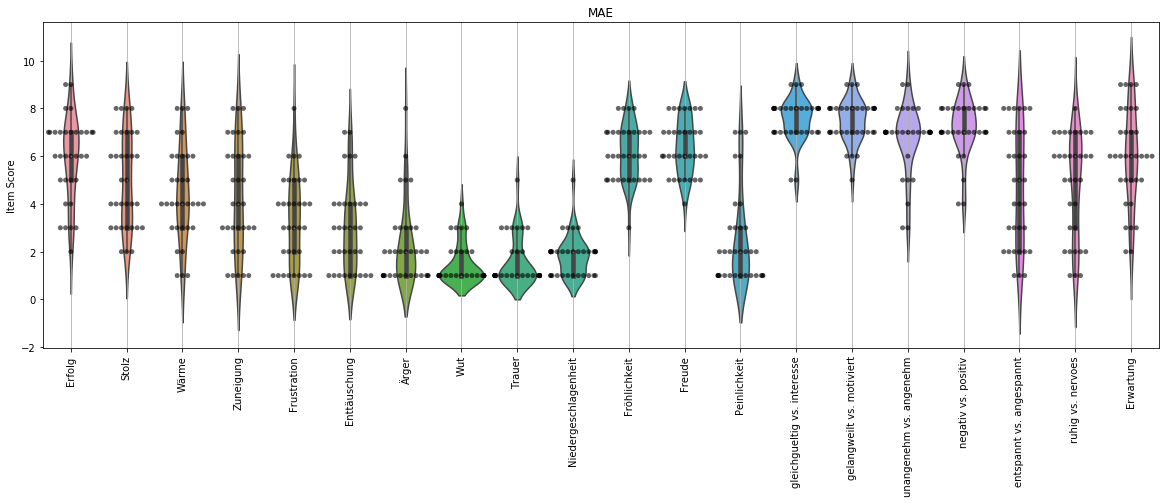

In [50]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

# Boxplot bdi
sns.violinplot(data=mood_data_2_long_form.iloc[: , :-1],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=mood_data_2_long_form.iloc[: , :-2], color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
#ax.set_title('MAE')


[Text(0, 0.5, 'Item Score')]

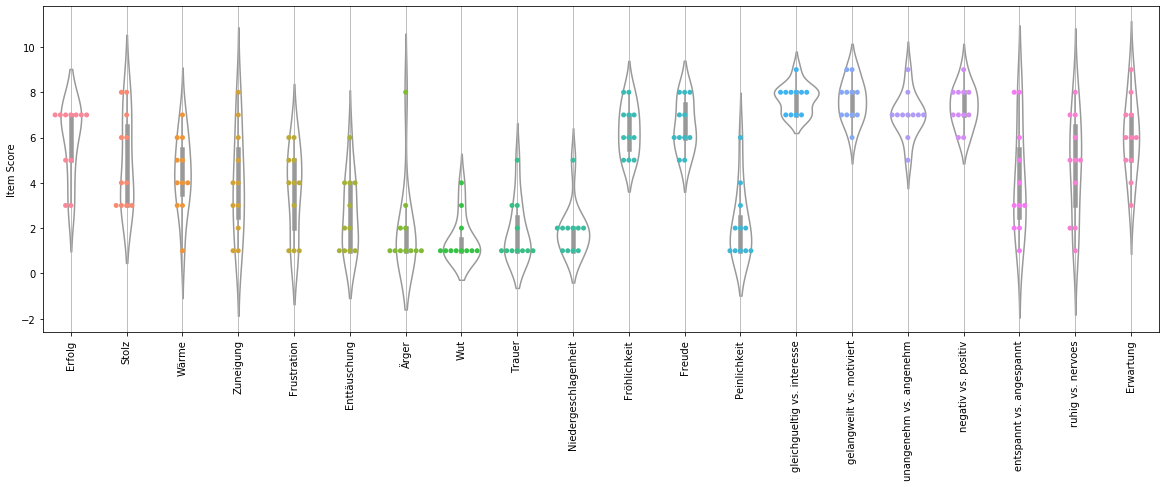

In [51]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

# Boxplot
sns.violinplot(data=mood_data_2_baseline.iloc[: , :-2], color='white',
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))
sns.swarmplot(data=mood_data_2_baseline.iloc[: , :-2])
# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")

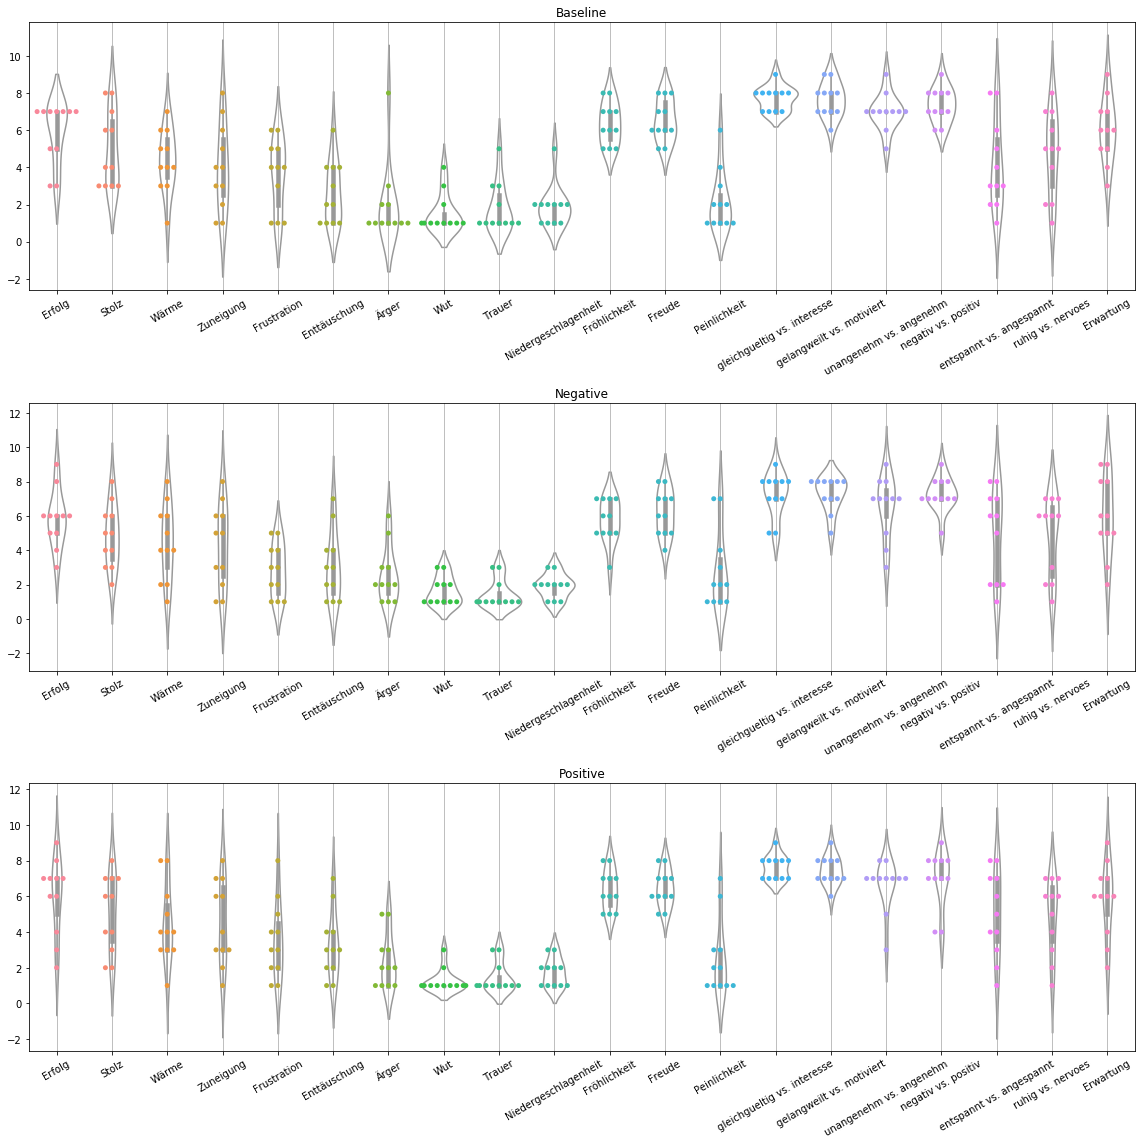

In [52]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(16,16))

ax1.set_title("Baseline")  # remove y label, but keep ticks
sns.violinplot(data=mood_data_2_baseline.iloc[: , :-2], ax=ax1, color='white')
sns.swarmplot(data=mood_data_2_baseline.iloc[: , :-2], ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
ax1.xaxis.grid(True)
#sns.swarmplot(x="feedback", y="similarity_score", data=df[df.nlp_model=='tfidf'], color="0.25", ax=ax1)

sns.violinplot(data=mood_data_2_neg.iloc[: , :-2], ax=ax2, color='white')
sns.swarmplot(data=mood_data_2_neg.iloc[: , :-2], ax=ax2)
ax2.set_title("Negative")  # remove y label, but keep ticks
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)
ax2.xaxis.grid(True)

ax3.set_title("Positive")  # remove y label, but keep ticks
sns.violinplot(data=mood_data_2_pos.iloc[: , :-2], ax=ax3, color='white')
sns.swarmplot(data=mood_data_2_pos.iloc[: , :-2], ax=ax3)
#sns.swarmplot(x="feedback", y="similarity_score", data=df[df.nlp_model=='doc2vec'], color="0.25", ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 30)
ax3.xaxis.grid(True)

plt.tight_layout()

plt.show()
f.savefig("/home/michael/Desktop/mood_scores_sample_2_output.png", dpi=300, bbox_inches='tight')

## Plot Mood Data for Sample 1

In [53]:
# rename columns
mood_data_1 = mood_data_1.rename(columns={'Code':'code', 'Bedinung':'condition'})
mood_data_1 = mood_data_1.rename(columns={'Wie stark sind die Gefühle Erfolg und Stolz vorhanden?':'erfolg/stolz',
                                          'Wie stark fühlen Sie sich niedergeschlagen, bedrückt, betrübt und traurig?':'niedergeschlagen/bedrueckt/betruebt/traurig',
                                          'Wie stark sind die Gefühle Wärme und Zuneigung vorhanden?':'waerme/zuneigung',
                                          'Wie stark sind die Gefühle Frustration und Enttäuschung vorhanden?':'frustration/enttaeuschung',
                                          'Wie stark fühlen Sie sich fröhlich, freudig, vergnügt und entzückt?':'froehlich/freudig/vergnuegt/entzueckt',
                                          'Wie stark fühlen Sie sich peinlich berührt?':'peinlich',
                                          'Wie stark sind die Gefühle Ärger und Wut vorhanden?':'aerger/wut',
                                          'Bitte schätzen Sie ein, wie Sie im nächsten Durchlauf der Aufgabe abschneiden werden?':'erwartung',
                                          'Bitte ordnen Sie ein, welche Gefühle am ehesten vorhanden sind.Lustlos/neugierig':'lustlos vs. neugierig',
                                          'Bitte ordnen Sie ein, welche Gefühle am ehesten vorhanden sind. Unangenehm/angenehm':'unangenehm vs. angenehm',
                                          'Bitte ordnen Sie ein, welche Gefühle am ehesten vorhanden sind. Entspannt/ angespannt --> umkodiert':'entspannt vs. angespannt',})

In [119]:
mood_data_1

code  erfolg/stolz  niedergeschlagen/bedrueckt/betruebt/traurig  \
0   1002             4                                            5   
1   2002             4                                            4   
2   3002             6                                            5   
3   1003             7                                            2   
4   2003             5                                            4   
..   ...           ...                                          ...   
76  2027             3                                            3   
77  3027             3                                            1   
78  1028             5                                            6   
79  2028             8                                            3   
80  3028             8                                            2   

    waerme/zuneigung  frustration/enttaeuschung  \
0                  6                          4   
1                  5                          4   
2                  4                          4   
3                  6                          1   
4                  5                          6   
..               ...                        ...   
76                 3                          3   
77                 4                          2   
78                 5                          2   
79                 6                          1   
80                 7                          2   

    froehlich/freudig/vergnuegt/entzueckt  peinlich  aerger/wut  erwartung  \
0                                       4         1           6          6   
1                                       5         6           5          5   
2                                       5         6           4          6   
3                                       6         1           2          7   
4                                       5         1           1          5   
..                                    ...       ...         ...        ...   
76                                      5         1           2          8   
77                                      5         1           1          7   
78                                      7         1           1          7   
79                                      7         1           1          8   
80                                      7         1           1          8   

   lustlos vs. neugierig unangenehm vs. angenehm entspannt vs. angespannt  \
0                      7                       7                        4   
1                      4                       5                        5   
2                      6                       5                        6   
3                      7                       8                        7   
4                      5                       6                        7   
..                   ...                     ...                      ...   
76                     5                       6                        2   
77                     5                       6                        2   
78                     7                       6                        7   
79                     8                       9                        4   
80                     8                       9                        4   

   condition  
0   baseline  
1   negative  
2   positive  
3   baseline  
4   negative  
..       ...  
76  negative  
77  positive  
78  baseline  
79  negative  
80  positive  

[81 rows x 13 columns]

In [120]:
mood_data_1.to_csv('/home/michael/master_thesis/mood/mood_data_sample1.tsv', sep='\t', index=False)

In [55]:
# rename conditions
for idx, i in enumerate(mood_data_1['condition']):
    if i == 'solo':
        mood_data_1['condition'][idx] = 'baseline'
    elif i == 'neg':
        mood_data_1['condition'][idx] = 'negative'
    elif i == 'pos':
        mood_data_1['condition'][idx] = 'positive'
        

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
# split dataframe by condition
grouped = mood_data_1.groupby(mood_data_1.condition)

mood_data_1_baseline = grouped.get_group("baseline")
mood_data_1_neg = grouped.get_group("negative")
mood_data_1_pos = grouped.get_group("positive")

In [57]:
mood_data_1_baseline.columns

Index(['code', 'erfolg/stolz', 'niedergeschlagen/bedrueckt/betruebt/traurig',
       'waerme/zuneigung', 'frustration/enttaeuschung',
       'froehlich/freudig/vergnuegt/entzueckt', 'peinlich', 'aerger/wut',
       'erwartung', 'lustlos vs. neugierig', 'unangenehm vs. angenehm',
       'entspannt vs. angespannt', 'condition'],
      dtype='object')

In [58]:
 mood_data_1_baseline.isnull().values.any()

False

In [59]:
# subject 6 has 3 nan in the last three items so drop
mood_data_1_baseline = mood_data_1_baseline.drop([12])
mood_data_1_neg = mood_data_1_neg.drop([13])
mood_data_1_pos = mood_data_1_pos.drop([14])

In [60]:
mood_data_1_baseline

code  erfolg/stolz  niedergeschlagen/bedrueckt/betruebt/traurig  \
0   1002             4                                            5   
3   1003             7                                            2   
6   1004             7                                            1   
9   1005             1                                            1   
15  1007             7                                            2   
18  1008             5                                            6   
21  1009             4                                            1   
24  1010             5                                            3   
27  1011             7                                            1   
30  1012             6                                            2   
33  1013             6                                            3   
36  1014             6                                            1   
39  1015             5                                            2   
42  1016             5                                            1   
45  1017             6                                            1   
48  1018             7                                            2   
51  1019             6                                            2   
54  1020             3                                            1   
57  1021             7                                            5   
60  1022             3                                            1   
63  1023             7                                            2   
66  1024             3                                            3   
69  1025             6                                            2   
72  1026             5                                            2   
75  1027             3                                            2   
78  1028             5                                            6   

    waerme/zuneigung  frustration/enttaeuschung  \
0                  6                          4   
3                  6                          1   
6                  7                          1   
9                  2                          1   
15                 8                          2   
18                 1                          1   
21                 3                          1   
24                 3                          2   
27                 5                          1   
30                 6                          2   
33                 8                          1   
36                 6                          1   
39                 7                          3   
42                 4                          1   
45                 3                          1   
48                 5                          1   
51                 5                          5   
54                 3                          1   
57                 8                          7   
60                 1                          1   
63                 6                          3   
66                 4                          1   
69                 6                          3   
72                 3                          1   
75                 4                          2   
78                 5                          2   

    froehlich/freudig/vergnuegt/entzueckt  peinlich  aerger/wut  erwartung  \
0                                       4         1           6          6   
3                                       6         1           2          7   
6                                       5         1           1          8   
9                                       5         1           1          5   
15                                      7         1           1          6   
18                                      5         1           1          5   
21                                      6         1           1          5   
24                                      5         2           1          6   
27    

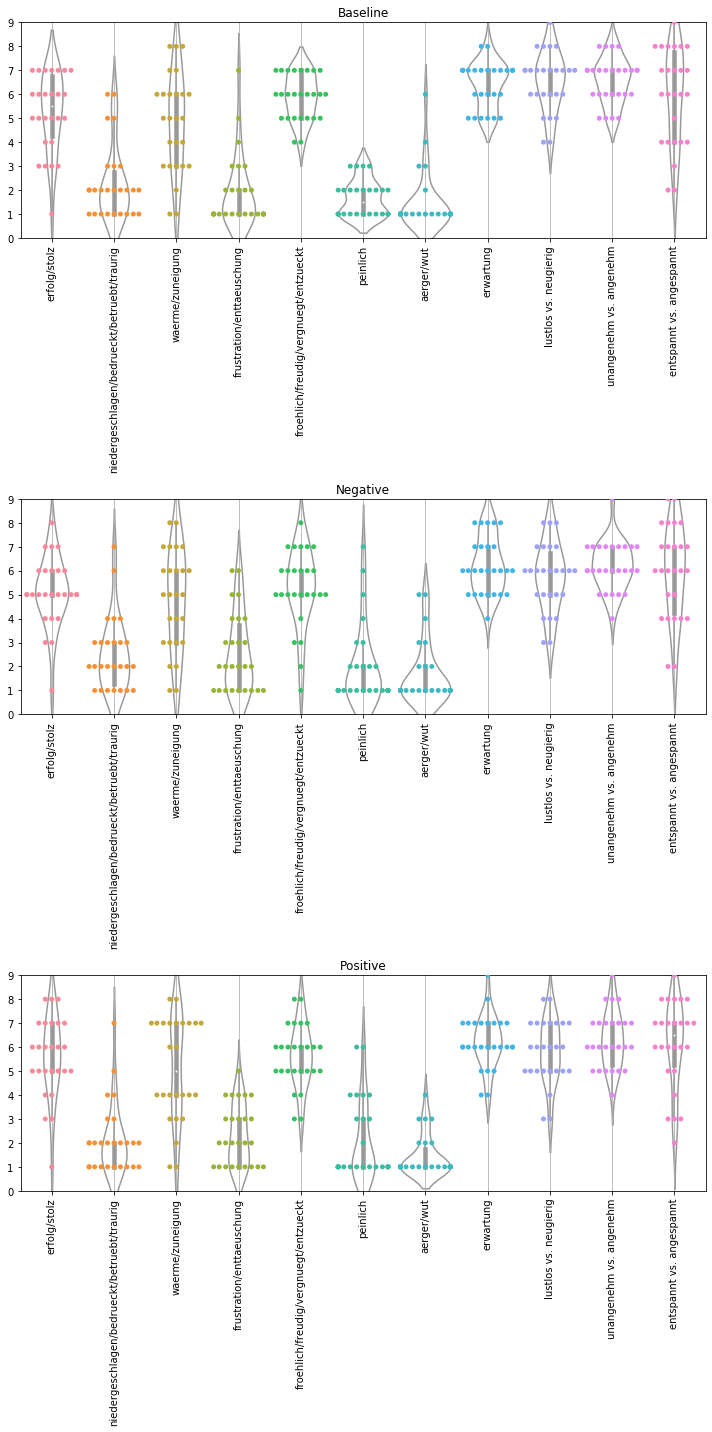

In [61]:
fig1, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,20))

ax1.set_title("Baseline")  # remove y label, but keep ticks
sns.violinplot(data=mood_data_1_baseline.iloc[: , 1:-1], ax=ax1, color='white')
sns.swarmplot(data=mood_data_1_baseline.iloc[: ,1:-1], ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax1.set_ylim([0,9])
ax1.xaxis.grid(True)

sns.violinplot(data=mood_data_1_neg.iloc[: , 1:-1], ax=ax2, color='white')
sns.swarmplot(data=mood_data_1_neg.iloc[: ,1:-1], ax=ax2)
ax2.set_title("Negative")  # remove y label, but keep ticks
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
ax2.set_ylim([0,9])
ax2.xaxis.grid(True)

ax3.set_title("Positive")  # remove y label, but keep ticks
sns.violinplot(data=mood_data_1_pos.iloc[: , 1:-1], ax=ax3, color='white')
sns.swarmplot(data=mood_data_1_pos.iloc[: , 1:-1], ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 90)
ax3.set_ylim([0,9])
ax3.xaxis.grid(True)

plt.tight_layout()

plt.show()
fig1.savefig("/home/michael/Desktop/mood_scores_sample_1_output.png", dpi=300, bbox_inches='tight')

## Calculate Correlations between mood items

In [62]:
# get correlation matrix for each mood item per sample per condition
mood_data_1_baseline_corr_matrix = mood_data_1_baseline.iloc[1:,1:].corr(method='spearman')
mood_data_1_neg_corr_matrix = mood_data_1_neg.iloc[1:,1:].corr(method='spearman')
mood_data_1_pos_corr_matrix = mood_data_1_pos.iloc[1:,1:].corr(method='spearman')
mood_data_2_baseline_corr_matrix = mood_data_2_baseline.iloc[:-1,:-1].corr(method='spearman')
mood_data_2_neg_corr_matrix = mood_data_2_neg.iloc[:-1,:-1].corr(method='spearman')
mood_data_2_pos_corr_matrix = mood_data_2_pos.iloc[:-1,:-1].corr(method='spearman')

In [63]:
mood_data_2_neg_corr_matrix.columns

Index(['Erfolg', 'Stolz', 'Wärme', 'Zuneigung', 'Frustration', 'Enttäuschung',
       'Ärger', 'Wut', 'Trauer', 'Niedergeschlagenheit', 'Fröhlichkeit',
       'Freude', 'Peinlichkeit', 'gleichgueltig vs. interesse',
       'gelangweilt vs. motiviert', 'unangenehm vs. angenehm',
       'negativ vs. positiv', 'entspannt vs. angespannt', 'ruhig vs. nervoes',
       'Erwartung'],
      dtype='object')

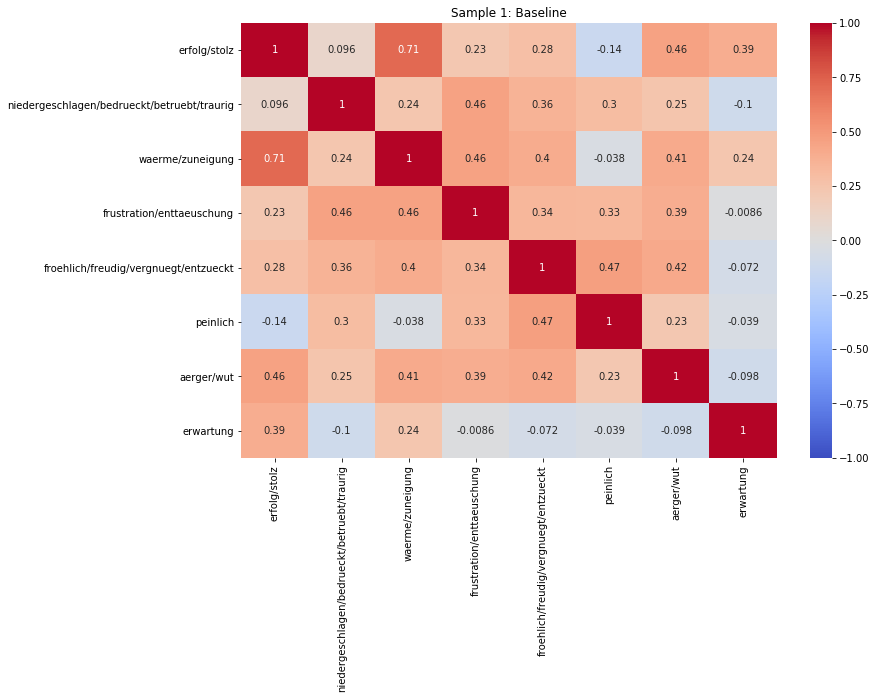

In [64]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(mood_data_1_baseline_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 1: Baseline')
sns_plot.figure.savefig("/home/michael/Desktop/sample1_baseline_corr.png", dpi=300, bbox_inches='tight')

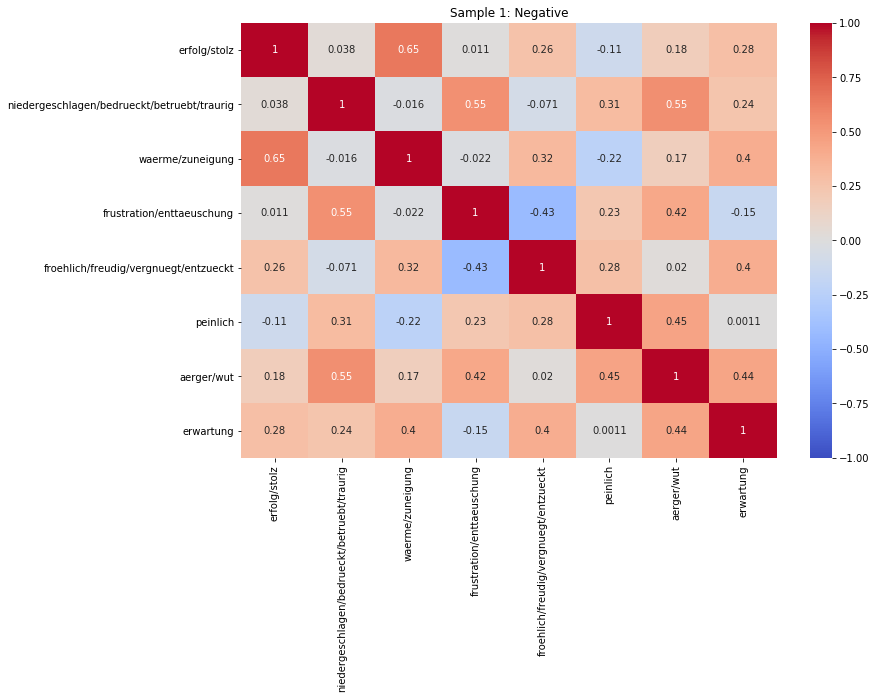

In [65]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(mood_data_1_neg_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 1: Negative')
sns_plot.figure.savefig("/home/michael/Desktop/sample1_neg_corr.png", dpi=300, bbox_inches='tight')

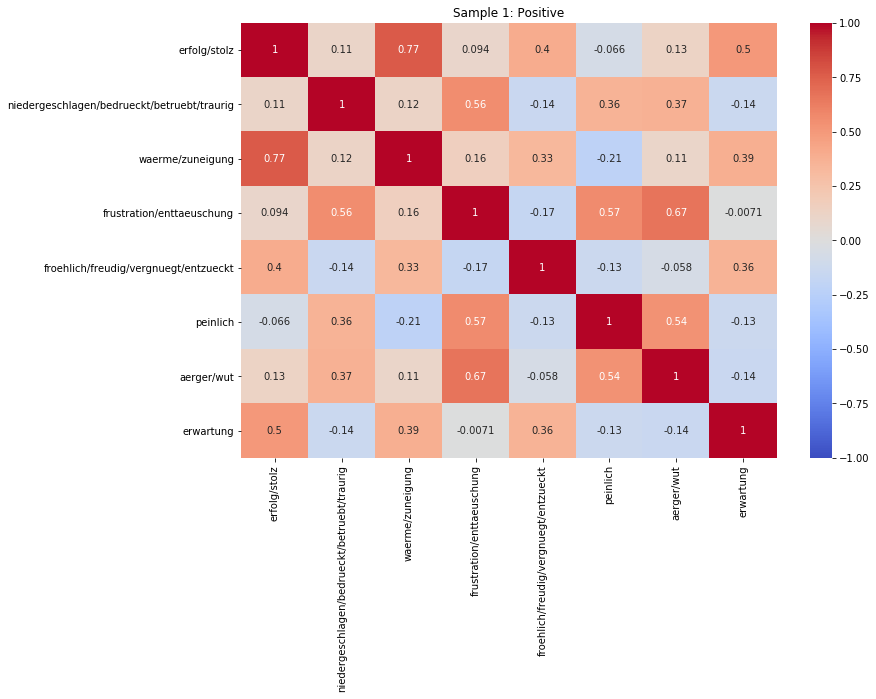

In [66]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(mood_data_1_pos_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 1: Positive')
sns_plot.figure.savefig("/home/michael/Desktop/sample1_pos_corr.png", dpi=300, bbox_inches='tight')

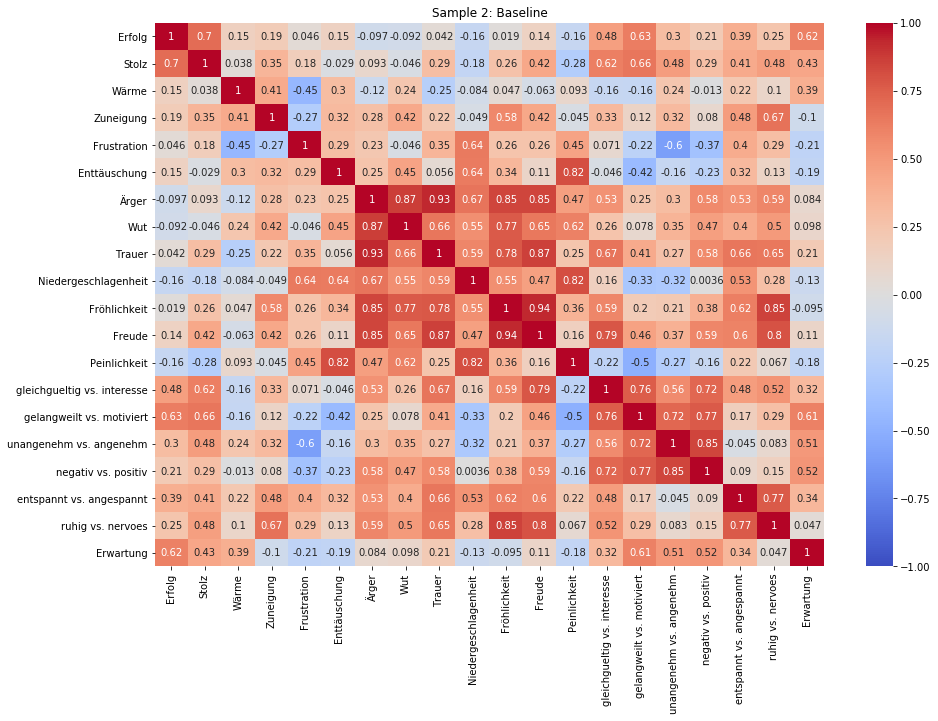

In [67]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(mood_data_2_baseline_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 2: Baseline')
sns_plot.figure.savefig("/home/michael/Desktop/sample2_baseline_corr.png", dpi=300, bbox_inches='tight')

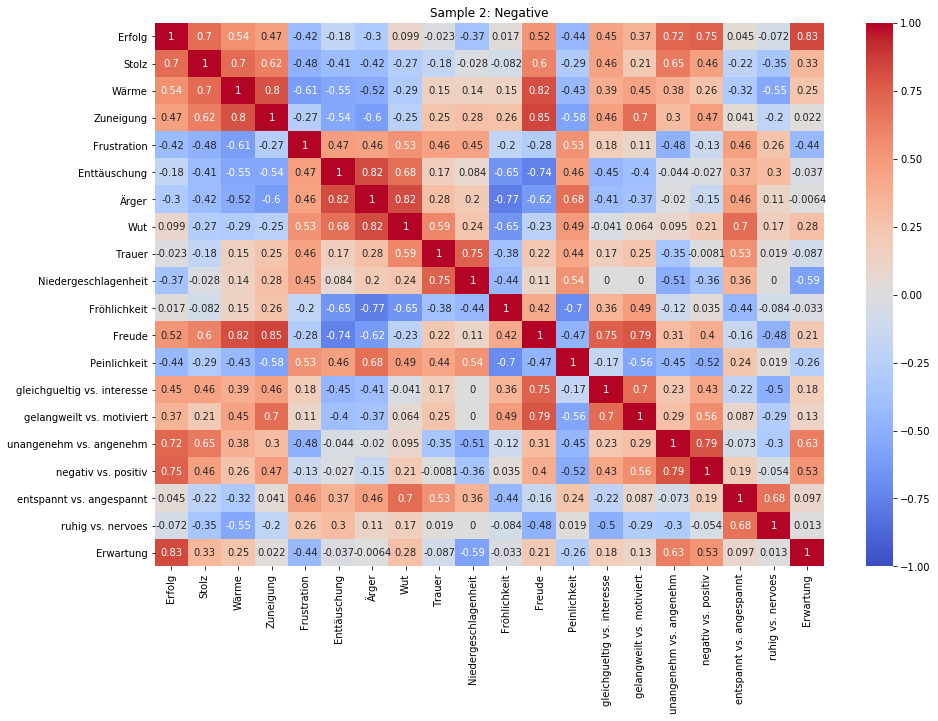

In [68]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(mood_data_2_neg_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 2: Negative')
sns_plot.figure.savefig("/home/michael/Desktop/sample2_neg_corr.png", dpi=300, bbox_inches='tight')

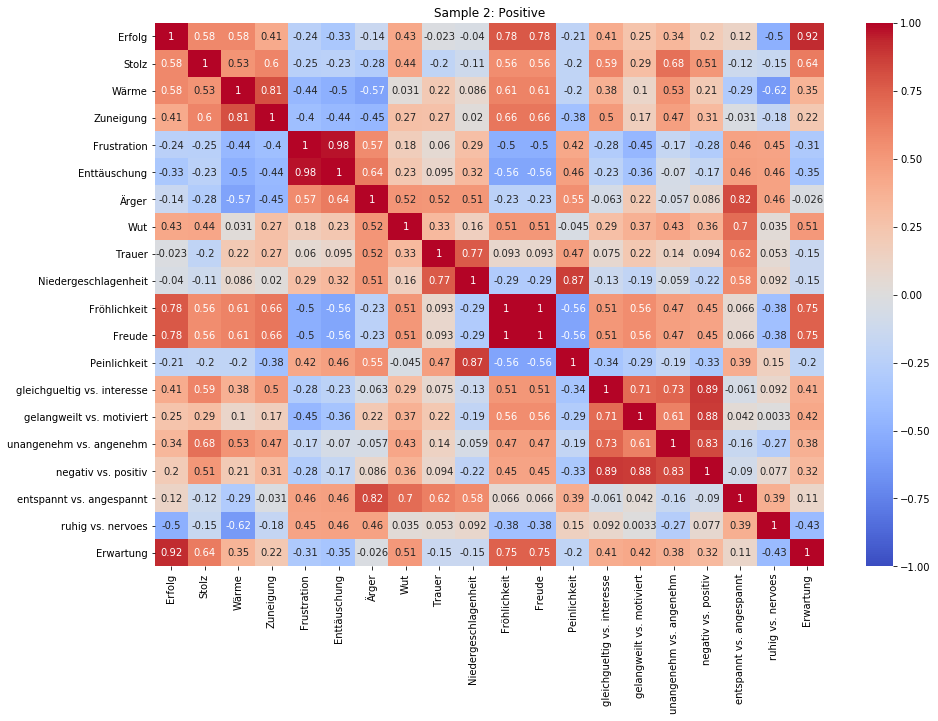

In [69]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(mood_data_2_pos_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 2: Positive')
sns_plot.figure.savefig("/home/michael/Desktop/sample2_pos_corr.png", dpi=300, bbox_inches='tight')

In [70]:
mood_data_1_baseline.columns

Index(['code', 'erfolg/stolz', 'niedergeschlagen/bedrueckt/betruebt/traurig',
       'waerme/zuneigung', 'frustration/enttaeuschung',
       'froehlich/freudig/vergnuegt/entzueckt', 'peinlich', 'aerger/wut',
       'erwartung', 'lustlos vs. neugierig', 'unangenehm vs. angenehm',
       'entspannt vs. angespannt', 'condition'],
      dtype='object')

In [71]:
mood_data_1_baseline

code  erfolg/stolz  niedergeschlagen/bedrueckt/betruebt/traurig  \
0   1002             4                                            5   
3   1003             7                                            2   
6   1004             7                                            1   
9   1005             1                                            1   
15  1007             7                                            2   
18  1008             5                                            6   
21  1009             4                                            1   
24  1010             5                                            3   
27  1011             7                                            1   
30  1012             6                                            2   
33  1013             6                                            3   
36  1014             6                                            1   
39  1015             5                                            2   
42  1016             5                                            1   
45  1017             6                                            1   
48  1018             7                                            2   
51  1019             6                                            2   
54  1020             3                                            1   
57  1021             7                                            5   
60  1022             3                                            1   
63  1023             7                                            2   
66  1024             3                                            3   
69  1025             6                                            2   
72  1026             5                                            2   
75  1027             3                                            2   
78  1028             5                                            6   

    waerme/zuneigung  frustration/enttaeuschung  \
0                  6                          4   
3                  6                          1   
6                  7                          1   
9                  2                          1   
15                 8                          2   
18                 1                          1   
21                 3                          1   
24                 3                          2   
27                 5                          1   
30                 6                          2   
33                 8                          1   
36                 6                          1   
39                 7                          3   
42                 4                          1   
45                 3                          1   
48                 5                          1   
51                 5                          5   
54                 3                          1   
57                 8                          7   
60                 1                          1   
63                 6                          3   
66                 4                          1   
69                 6                          3   
72                 3                          1   
75                 4                          2   
78                 5                          2   

    froehlich/freudig/vergnuegt/entzueckt  peinlich  aerger/wut  erwartung  \
0                                       4         1           6          6   
3                                       6         1           2          7   
6                                       5         1           1          8   
9                                       5         1           1          5   
15                                      7         1           1          6   
18                                      5         1           1          5   
21                                      6         1           1          5   
24                                      5         2           1          6   
27    

In [72]:
mood_data_1_pos.mean()

code                                           3.015346e+03
erfolg/stolz                                   5.576923e+00
niedergeschlagen/bedrueckt/betruebt/traurig    2.153846e+00
waerme/zuneigung                               5.076923e+00
frustration/enttaeuschung                      2.346154e+00
froehlich/freudig/vergnuegt/entzueckt          5.615385e+00
peinlich                                       2.115385e+00
aerger/wut                                     1.461538e+00
erwartung                                      6.230769e+00
lustlos vs. neugierig                          2.606018e+24
unangenehm vs. angenehm                        2.259869e+24
entspannt vs. angespannt                       2.649485e+24
dtype: float64

In [73]:
mood_data_1_baseline.iloc[:,1:-1].astype(int)

erfolg/stolz  niedergeschlagen/bedrueckt/betruebt/traurig  \
0              4                                            5   
3              7                                            2   
6              7                                            1   
9              1                                            1   
15             7                                            2   
18             5                                            6   
21             4                                            1   
24             5                                            3   
27             7                                            1   
30             6                                            2   
33             6                                            3   
36             6                                            1   
39             5                                            2   
42             5                                            1   
45             6                                            1   
48             7                                            2   
51             6                                            2   
54             3                                            1   
57             7                                            5   
60             3                                            1   
63             7                                            2   
66             3                                            3   
69             6                                            2   
72             5                                            2   
75             3                                            2   
78             5                                            6   

    waerme/zuneigung  frustration/enttaeuschung  \
0                  6                          4   
3                  6                          1   
6                  7                          1   
9                  2                          1   
15                 8                          2   
18                 1                          1   
21                 3                          1   
24                 3                          2   
27                 5                          1   
30                 6                          2   
33                 8                          1   
36                 6                          1   
39                 7                          3   
42                 4                          1   
45                 3                          1   
48                 5                          1   
51                 5                          5   
54                 3                          1   
57                 8                          7   
60                 1                          1   
63                 6                          3   
66                 4                          1   
69                 6                          3   
72                 3                          1   
75                 4                          2   
78                 5                          2   

    froehlich/freudig/vergnuegt/entzueckt  peinlich  aerger/wut  erwartung  \
0                                       4         1           6          6   
3                                       6         1           2          7   
6                                       5         1           1          8   
9                                       5         1           1          5   
15                                      7         1           1          6   
18                                      5         1           1          5   
21                                      6         1           1          5   
24                                      5         2           1          6   
27                                      4         1           1          7   
30                                      7         2           3          5   
33          

## Change in mood over time

In [74]:
mood_data_1_baseline_means = mood_data_1_baseline.iloc[:,1:-1].astype(int).mean().to_frame(name='s1_baseline_mean').T
mood_data_1_baseline_std = mood_data_1_baseline.iloc[:,1:-1].astype(int).std().to_frame(name='s1_baseline_std').T
mood_data_1_neg_means = mood_data_1_neg.iloc[:,1:-1].astype(int).mean().to_frame(name='s1_neg_mean').T
mood_data_1_neg_std = mood_data_1_neg.iloc[:,1:-1].astype(int).std().to_frame(name='s1_neg_std').T
mood_data_1_pos_means = mood_data_1_pos.iloc[:,1:-1].astype(int).mean().to_frame(name='s1_pro_mean').T
mood_data_1_pos_std = mood_data_1_pos.iloc[:,1:-1].astype(int).std().to_frame(name='s1_pro_std').T


mood_data_2_baseline_means = mood_data_2_baseline.iloc[:,:-1].mean().to_frame(name='s2_baseline_mean').T
mood_data_2_baseline_std = mood_data_2_baseline.iloc[:,:-1].std().to_frame(name='s2_baseline_std').T
mood_data_2_neg_means = mood_data_2_neg.iloc[:,:-1].mean().to_frame(name='s2_neg_mean').T
mood_data_2_neg_std = mood_data_2_neg.iloc[:,:-1].std().to_frame(name='s2_neg_std').T
mood_data_2_pos_means = mood_data_2_pos.iloc[:,:-1].mean().to_frame(name='s2_pro_mean').T
mood_data_2_pos_std = mood_data_2_pos.iloc[:,:-1].std().to_frame(name='s2_pro_std').T

In [75]:
type(mood_data_2_baseline['gelangweilt vs. motiviert'].values[0])

numpy.int64

In [76]:
type(mood_data_1_baseline['lustlos vs. neugierig'].values[0])

str

In [77]:
mood_data_1_neg_means

erfolg/stolz  niedergeschlagen/bedrueckt/betruebt/traurig  \
s1_neg_mean      5.115385                                     2.538462   

             waerme/zuneigung  frustration/enttaeuschung  \
s1_neg_mean          4.769231                   2.576923   

             froehlich/freudig/vergnuegt/entzueckt  peinlich  aerger/wut  \
s1_neg_mean                               5.269231  2.038462    1.692308   

             erwartung  lustlos vs. neugierig  unangenehm vs. angenehm  \
s1_neg_mean   6.192308               5.730769                 6.192308   

             entspannt vs. angespannt  
s1_neg_mean                  5.961538

In [78]:
mood_data_2_neg.iloc[:,1:-1]

Stolz  Wärme  Zuneigung  Frustration  Enttäuschung  Ärger  Wut  Trauer  \
0       6      6          5            1             4      2    1       1   
1       5      4          2            2             1      2    1       1   
2       5      2          1            5             6      5    2       1   
3       4      6          6            2             2      2    1       1   
4       2      2          3            5             4      3    2       3   
5       6      4          7            4             2      1    1       1   
6       3      5          5            4             3      2    2       2   
7       7      7          6            1             1      1    1       1   
8       3      1          1            3             7      6    3       1   
9       8      8          8            3             3      3    3       3   
10      4      4          3            1             1      1    1       1   

    Niedergeschlagenheit  Fröhlichkeit  Freude  Peinlichkeit  \
0                      2             5       5             2   
1                      2             6       6             4   
2                      2             5       5             7   
3                      2             7       7             1   
4                      3             5       5             7   
5                      2             7       7             1   
6                      2             7       7             2   
7                      1             7       8             1   
8                      1             5       4             2   
9                      3             3       8             3   
10                     1             6       6             1   

    gleichgueltig vs. interesse  gelangweilt vs. motiviert  \
0                             5                          5   
1                             7                          6   
2                             8                          7   
3                             7                          8   
4                             7                          7   
5                             8                          8   
6                             8                          8   
7                             9                          8   
8                             5                          7   
9                             8                          8   
10                            8                          8   

    unangenehm vs. angenehm  negativ vs. positiv  entspannt vs. angespannt  \
0                         7                    7                         2   
1                         5                    5                         5   
2                         7                    7                         2   
3                         7                    7                         2   
4                         3                    7                         7   
5                         7                    8                         7   
6                         4                    7                         6   
7                         9                    9                         1   
8                         8                    8                         8   
9                         8                    8                         8   
10                        7                    7                         6   

    ruhig vs. nervoes  Erwartung condition  
0                   6          6  negative  
1                   6          6  negative  
2                   2          5  negative  
3                   2          3  negative  
4                   6          2  negative  
5                   7          5  negative  
6                   6          8  negative  
7                   1          9  negative  
8                   7          9  negative  
9                   3          8  negative  
10                  7          5  negative

In [79]:
mood_data_1_pos_means.T

s1_pro_mean
erfolg/stolz                                    5.576923
niedergeschlagen/bedrueckt/betruebt/traurig     2.153846
waerme/zuneigung                                5.076923
frustration/enttaeuschung                       2.346154
froehlich/freudig/vergnuegt/entzueckt           5.615385
peinlich                                        2.115385
aerger/wut                                      1.461538
erwartung                                       6.230769
lustlos vs. neugierig                           5.807692
unangenehm vs. angenehm                         6.307692
entspannt vs. angespannt                        6.115385

In [80]:
s1_mood_means = pd.concat([mood_data_1_baseline_means, mood_data_1_neg_means,
                           mood_data_1_pos_means])
s1_mood_std = pd.concat([mood_data_1_baseline_std, mood_data_1_neg_std,
                         mood_data_1_pos_std])

s2_mood_means = pd.concat([mood_data_2_baseline_means, mood_data_2_neg_means,
                           mood_data_2_pos_means])
s2_mood_std = pd.concat([mood_data_2_baseline_std, mood_data_2_neg_std,
                         mood_data_2_pos_std])



In [108]:
s1_mood_means_std = pd.concat([s1_mood_means, s1_mood_std])
s2_mood_means_std = pd.concat([s2_mood_means, s2_mood_std])

In [123]:
s1_mood_means_std.T.to_csv('/home/michael/master_thesis/s1_mood_means_std.tsv', sep='\t')
s2_mood_means_std.T.to_csv('/home/michael/master_thesis/s2_mood_means_std.tsv', sep='\t')

In [111]:
s2_mood_means_std.T

s2_baseline_mean  s2_neg_mean  s2_pro_mean  \
Erfolg                                   5.91         5.82         6.00   
Stolz                                    5.00         4.82         5.09   
Wärme                                    4.36         4.45         4.45   
Zuneigung                                4.00         4.27         4.55   
Frustration                              3.64         2.82         3.55   
Enttäuschung                             2.64         3.09         3.27   
Ärger                                    2.00         2.55         2.36   
Wut                                      1.55         1.64         1.27   
Trauer                                   1.82         1.45         1.45   
Niedergeschlagenheit                     1.91         1.91         1.73   
Fröhlichkeit                             6.36         5.73         6.36   
Freude                                   6.55         6.18         6.45   
Peinlichkeit                             2.18         2.82         2.55   
gleichgueltig vs. interesse              7.73         7.27         7.64   
gelangweilt vs. motiviert                7.64         7.27         7.45   
unangenehm vs. angenehm                  7.00         6.55         6.64   
negativ vs. positiv                      7.36         7.27         7.00   
entspannt vs. angespannt                 4.09         4.91         5.00   
ruhig vs. nervoes                        4.73         4.82         4.91   
Erwartung                                6.00         6.00         5.82   

                             s2_baseline_std  s2_neg_std  s2_pro_std  
Erfolg                                  1.64        1.66        2.14  
Stolz                                   2.05        1.83        2.17  
Wärme                                   1.69        2.21        2.16  
Zuneigung                               2.32        2.41        2.34  
Frustration                             1.91        1.54        2.16  
Enttäuschung                            1.69        2.02        1.90  
Ärger                                   2.10        1.63        1.50  
Wut                                     1.04        0.81        0.65  
Trauer                                  1.33        0.82        0.82  
Niedergeschlagenheit                    1.14        0.70        0.79  
Fröhlichkeit                            1.12        1.27        1.12  
Freude                                  1.13        1.33        1.04  
Peinlichkeit                            1.60        2.27        2.11  
gleichgueltig vs. interesse             0.65        1.27        0.67  
gelangweilt vs. motiviert               0.92        1.01        0.82  
unangenehm vs. angenehm                 1.00        1.81        1.43  
negativ vs. positiv                     0.92        1.01        1.61  
entspannt vs. angespannt                2.39        2.66        2.41  
ruhig vs. nervoes                       2.28        2.32        2.12  
Erwartung                               1.73        2.32        2.09

In [86]:
column_labels = s1_mood_means.columns.to_list()

[Text(0.5, 1.0, 'Sample1')]

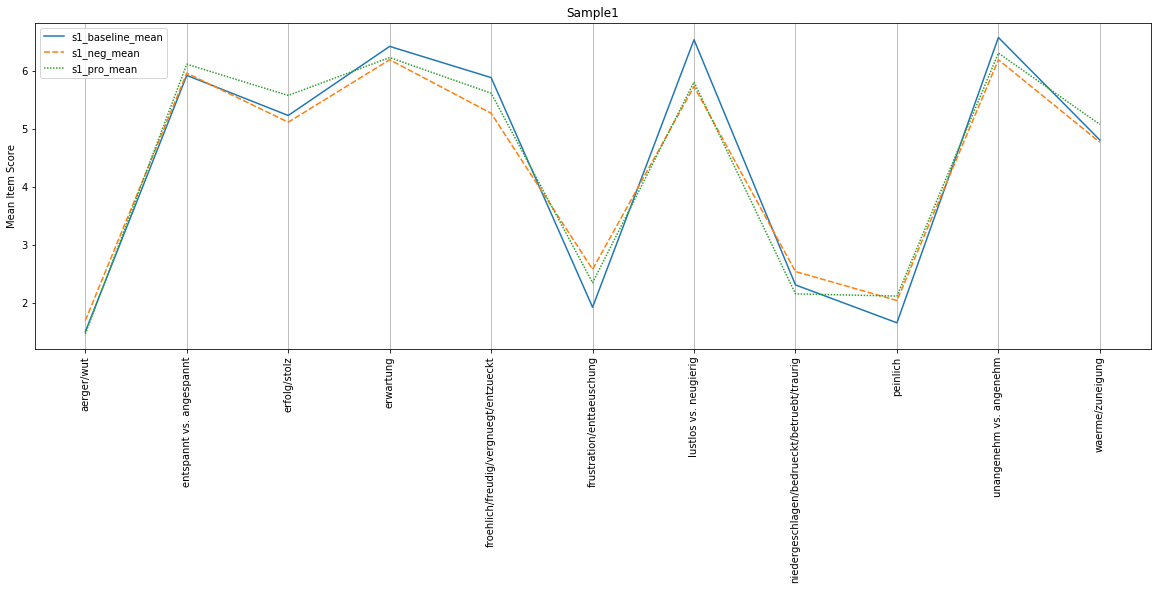

In [87]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

#plt.plot(mood_data_2_baseline_means.T['s2_baseline_mean'])
sns.lineplot(data=s1_mood_means.T, ax=ax)
#sns.swarmplot(s1_mood_means.T)
# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 20)
ax.tick_params(axis='x', rotation=90)
#plt.tight_layout()

ax.set(ylabel="Mean Item Score")
ax.set(title='Sample1')

In [88]:
s1_mood_means

erfolg/stolz  niedergeschlagen/bedrueckt/betruebt/traurig  \
s1_baseline_mean          5.23                                         2.31   
s1_neg_mean               5.12                                         2.54   
s1_pro_mean               5.58                                         2.15   

                  waerme/zuneigung  frustration/enttaeuschung  \
s1_baseline_mean              4.81                       1.92   
s1_neg_mean                   4.77                       2.58   
s1_pro_mean                   5.08                       2.35   

                  froehlich/freudig/vergnuegt/entzueckt  peinlich  aerger/wut  \
s1_baseline_mean                                   5.88      1.65        1.50   
s1_neg_mean                                        5.27      2.04        1.69   
s1_pro_mean                                        5.62      2.12        1.46   

                  erwartung  lustlos vs. neugierig  unangenehm vs. angenehm  \
s1_baseline_mean       6.42                   6.54                     6.58   
s1_neg_mean            6.19                   5.73                     6.19   
s1_pro_mean            6.23                   5.81                     6.31   

                  entspannt vs. angespannt  
s1_baseline_mean                      5.92  
s1_neg_mean                           5.96  
s1_pro_mean                           6.12

In [89]:
upper = pd.DataFrame(s1_mood_means.values + s1_mood_std.values, columns=s1_mood_means.columns,
                     index=['baseline_mean + sdt','negative_mean + sdt', 'positive_mean + sdt'])
lower = pd.DataFrame(s1_mood_means.values - s1_mood_std.values, columns=s1_mood_means.columns,
                    index=['baseline_mean - sdt','negative_mean - sdt', 'positive_mean - sdt'])

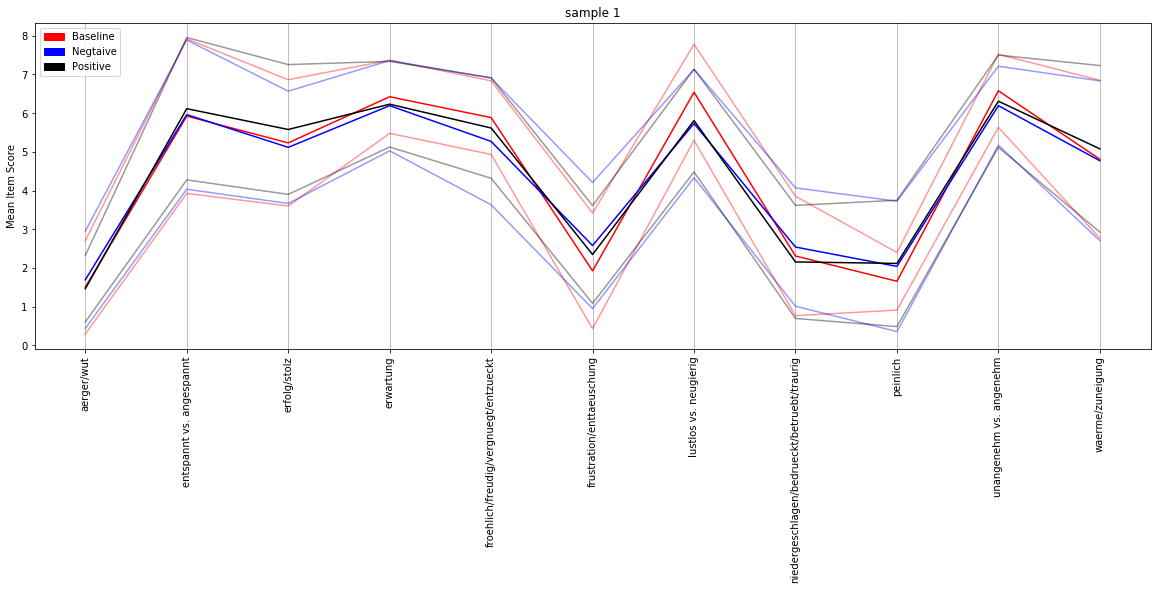

In [90]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

x = s1_mood_means.T['s1_baseline_mean']
x_upper = upper.T['baseline_mean + sdt']
x_lower = lower.T['baseline_mean - sdt']

x_1 = s1_mood_means.T['s1_neg_mean']
x_upper_1 = upper.T['negative_mean + sdt']
x_lower_1 = lower.T['negative_mean - sdt']

x_2 = s1_mood_means.T['s1_pro_mean']
x_upper_2 = upper.T['positive_mean + sdt']
x_lower_2 = lower.T['positive_mean - sdt']

sns.lineplot(data=x, ax=ax, color='r')
sns.lineplot(data=x_upper, ax=ax, color='r', alpha=0.4)
sns.lineplot(data=x_lower, ax=ax, color='r', alpha=0.4)

sns.lineplot(data=x_1, ax=ax, color='b')
sns.lineplot(data=x_upper_1, ax=ax, color='b', alpha=0.4)
sns.lineplot(data=x_lower_1, ax=ax, color='b', alpha=0.4)

sns.lineplot(data=x_2, ax=ax, color='black')
sns.lineplot(data=x_upper_2, ax=ax, color='black', alpha=0.4)
sns.lineplot(data=x_lower_2, ax=ax, color='black', alpha=0.4)
#sns.swarmplot(s1_mood_means.T)
# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 20)
ax.tick_params(axis='x', rotation=90)
#plt.tight_layout()

ax.set(ylabel="Mean Item Score")
ax.set_title('sample 1')
red_line = mpatches.Patch(color='r', label='Baseline')
blue_line = mpatches.Patch(color='b', label='Negtaive')
black_line = mpatches.Patch(color='black', label='Positive')

plt.legend(handles=[red_line, blue_line, black_line])

In [91]:
upper = pd.DataFrame(s2_mood_means.values + s2_mood_std.values, columns=s2_mood_means.columns,
                     index=['baseline_mean + sdt','negative_mean + sdt', 'positive_mean + sdt'])
lower = pd.DataFrame(s2_mood_means.values - s2_mood_std.values, columns=s2_mood_means.columns,
                    index=['baseline_mean - sdt','negative_mean - sdt', 'positive_mean - sdt'])

In [93]:
s2_mood_means

Erfolg  Stolz  Wärme  Zuneigung  Frustration  Enttäuschung  \
s2_baseline_mean    5.91   5.00   4.36       4.00         3.64          2.64   
s2_neg_mean         5.82   4.82   4.45       4.27         2.82          3.09   
s2_pro_mean         6.00   5.09   4.45       4.55         3.55          3.27   

                  Ärger  Wut  Trauer  Niedergeschlagenheit  Fröhlichkeit  \
s2_baseline_mean   2.00 1.55    1.82                  1.91          6.36   
s2_neg_mean        2.55 1.64    1.45                  1.91          5.73   
s2_pro_mean        2.36 1.27    1.45                  1.73          6.36   

                  Freude  Peinlichkeit  gleichgueltig vs. interesse  \
s2_baseline_mean    6.55          2.18                         7.73   
s2_neg_mean         6.18          2.82                         7.27   
s2_pro_mean         6.45          2.55                         7.64   

                  gelangweilt vs. motiviert  unangenehm vs. angenehm  \
s2_baseline_mean                       7.64                     7.00   
s2_neg_mean                            7.27                     6.55   
s2_pro_mean                            7.45                     6.64   

                  negativ vs. positiv  entspannt vs. angespannt  \
s2_baseline_mean                 7.36                      4.09   
s2_neg_mean                      7.27                      4.91   
s2_pro_mean                      7.00                      5.00   

                  ruhig vs. nervoes  Erwartung  
s2_baseline_mean               4.73       6.00  
s2_neg_mean                    4.82       6.00  
s2_pro_mean                    4.91       5.82

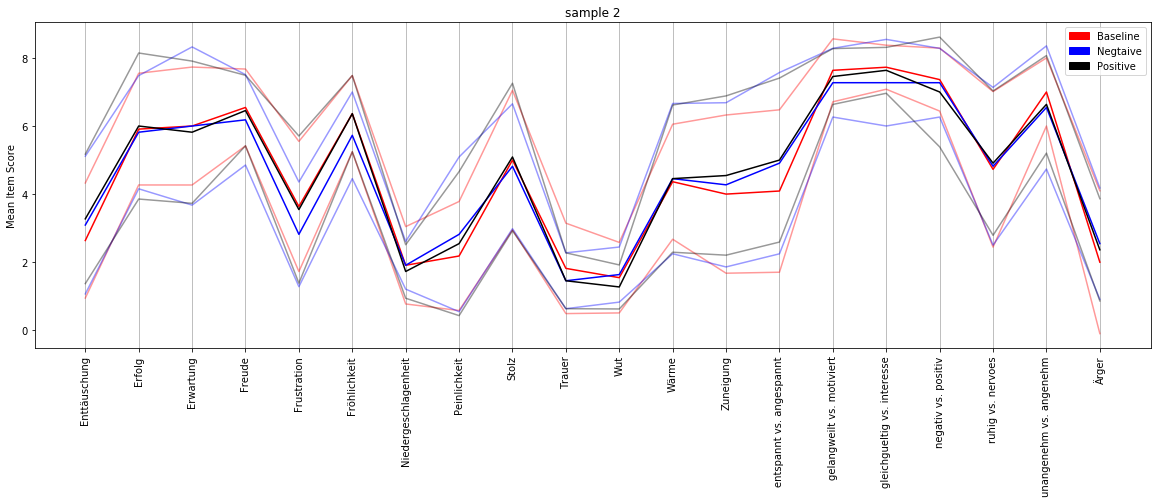

In [94]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

x = s2_mood_means.T['s2_baseline_mean']
x_upper = upper.T['baseline_mean + sdt']
x_lower = lower.T['baseline_mean - sdt']

x_1 = s2_mood_means.T['s2_neg_mean']
x_upper_1 = upper.T['negative_mean + sdt']
x_lower_1 = lower.T['negative_mean - sdt']

x_2 = s2_mood_means.T['s2_pro_mean']
x_upper_2 = upper.T['positive_mean + sdt']
x_lower_2 = lower.T['positive_mean - sdt']

sns.lineplot(data=x, ax=ax, color='r')
sns.lineplot(data=x_upper, ax=ax, color='r', alpha=0.4)
sns.lineplot(data=x_lower, ax=ax, color='r', alpha=0.4)

sns.lineplot(data=x_1, ax=ax, color='b')
sns.lineplot(data=x_upper_1, ax=ax, color='b', alpha=0.4)
sns.lineplot(data=x_lower_1, ax=ax, color='b', alpha=0.4)

sns.lineplot(data=x_2, ax=ax, color='black')
sns.lineplot(data=x_upper_2, ax=ax, color='black', alpha=0.4)
sns.lineplot(data=x_lower_2, ax=ax, color='black', alpha=0.4)
#sns.swarmplot(s1_mood_means.T)
# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 20)
ax.tick_params(axis='x', rotation=90)
#plt.tight_layout()

ax.set(ylabel="Mean Item Score")
ax.set_title('sample 2')
red_line = mpatches.Patch(color='r', label='Baseline')
blue_line = mpatches.Patch(color='b', label='Negtaive')
black_line = mpatches.Patch(color='black', label='Positive')

plt.legend(handles=[red_line, blue_line, black_line])

In [115]:
mood_data_1_baseline_froehlich

frustration_baseline
0                      4
1                      1
2                      1
3                      1
4                      2
5                      1
6                      1
7                      2
8                      1
9                      2
10                     1
11                     1
12                     3
13                     1
14                     1
15                     1
16                     5
17                     1
18                     7
19                     1
20                     3
21                     1
22                     3
23                     1
24                     2
25                     2

# separate variables for each item

In [116]:
# erfolg
mood_data_1_baseline_erfolg = mood_data_1_baseline.iloc[:,1:2]
mood_data_1_baseline_erfolg = mood_data_1_baseline_erfolg.rename(columns={'erfolg/stolz':'erfolg_baseline'})
mood_data_1_neg_erfolg = mood_data_1_neg.iloc[:,1:2]
mood_data_1_neg_erfolg = mood_data_1_neg_erfolg.rename(columns={'erfolg/stolz':'erfolg_negative'})
mood_data_1_pos_erfolg = mood_data_1_pos.iloc[:,1:2]
mood_data_1_pos_erfolg = mood_data_1_pos_erfolg.rename(columns={'erfolg/stolz':'erfpolg_positive'})
mood_data_1_baseline_erfolg.reset_index(drop=True, inplace=True)
mood_data_1_neg_erfolg.reset_index(drop=True, inplace=True)
mood_data_1_pos_erfolg.reset_index(drop=True, inplace=True)
erfolg_stolz = pd.concat([mood_data_1_baseline_erfolg, mood_data_1_neg_erfolg, mood_data_1_pos_erfolg], axis=1)

# niedergeschlagen/bedrueckt/betruebt/traurig
mood_data_1_baseline_traurig = mood_data_1_baseline.iloc[:,2:3]
mood_data_1_baseline_traurig = mood_data_1_baseline_traurig.rename(columns={'niedergeschlagen/bedrueckt/betruebt/traurig':'traurig_baseline'})
mood_data_1_neg_traurig = mood_data_1_neg.iloc[:,2:3]
mood_data_1_neg_traurig = mood_data_1_neg_traurig.rename(columns={'niedergeschlagen/bedrueckt/betruebt/traurig':'traurig_negative'})
mood_data_1_pos_traurig = mood_data_1_pos.iloc[:,2:3]
mood_data_1_pos_traurig = mood_data_1_pos_traurig.rename(columns={'niedergeschlagen/bedrueckt/betruebt/traurig':'traurig_positive'})
mood_data_1_baseline_traurig.reset_index(drop=True, inplace=True)
mood_data_1_neg_traurig.reset_index(drop=True, inplace=True)
mood_data_1_pos_traurig.reset_index(drop=True, inplace=True)

traurig = pd.concat([mood_data_1_baseline_traurig, mood_data_1_neg_traurig, mood_data_1_pos_traurig], axis=1)

# waerme/zuneigung
mood_data_1_baseline_waerme = mood_data_1_baseline.iloc[:,3:4]
mood_data_1_baseline_waerme = mood_data_1_baseline_waerme.rename(columns={'waerme/zuneigung':'waerme_baseline'})
mood_data_1_neg_waerme = mood_data_1_neg.iloc[:,3:4]
mood_data_1_neg_waerme = mood_data_1_neg_waerme.rename(columns={'waerme/zuneigung':'waerme_negative'})
mood_data_1_pos_waerme = mood_data_1_pos.iloc[:,3:4]
mood_data_1_pos_waerme = mood_data_1_pos_waerme.rename(columns={'waerme/zuneigung':'waerme_positive'})
mood_data_1_baseline_waerme.reset_index(drop=True, inplace=True)
mood_data_1_neg_waerme.reset_index(drop=True, inplace=True)
mood_data_1_pos_waerme.reset_index(drop=True, inplace=True)

waerme = pd.concat([mood_data_1_baseline_waerme, mood_data_1_neg_waerme, mood_data_1_pos_waerme], axis=1)

# frustration/enttaeuschung
mood_data_1_baseline_frustration = mood_data_1_baseline.iloc[:,4:5]
mood_data_1_baseline_frustration = mood_data_1_baseline_frustration.rename(columns={'frustration/enttaeuschung':'frustration_baseline'})
mood_data_1_neg_frustration = mood_data_1_neg.iloc[:,4:5]
mood_data_1_neg_frustration = mood_data_1_neg_frustration.rename(columns={'frustration/enttaeuschung':'frustration_negative'})
mood_data_1_pos_frustration = mood_data_1_pos.iloc[:,4:5]
mood_data_1_pos_frustration = mood_data_1_pos_frustration.rename(columns={'frustration/enttaeuschung':'frustration_positive'})
mood_data_1_baseline_frustration.reset_index(drop=True, inplace=True)
mood_data_1_neg_frustration.reset_index(drop=True, inplace=True)
mood_data_1_pos_frustration.reset_index(drop=True, inplace=True)

frustration = pd.concat([mood_data_1_baseline_frustration, mood_data_1_neg_frustration,
                         mood_data_1_pos_frustration], axis=1)

# froehlich/freudig/vergnuegt/entzueckt
mood_data_1_baseline_froehlich = mood_data_1_baseline.iloc[:,5:6]
mood_data_1_baseline_froehlich = mood_data_1_baseline_froehlich.rename(columns={'froehlich/freudig/vergnuegt/entzueckt':'froehlich_baseline'})
mood_data_1_neg_froehlich = mood_data_1_neg.iloc[:,5:6]
mood_data_1_neg_froehlich = mood_data_1_neg_froehlich.rename(columns={'froehlich/freudig/vergnuegt/entzueckt':'froehlich_negative'})
mood_data_1_pos_froehlich = mood_data_1_pos.iloc[:,5:6]
mood_data_1_pos_froehlich = mood_data_1_pos_froehlich.rename(columns={'froehlich/freudig/vergnuegt/entzueckt':'froehlich_positive'})
mood_data_1_baseline_froehlich.reset_index(drop=True, inplace=True)
mood_data_1_neg_froehlich.reset_index(drop=True, inplace=True)
mood_data_1_pos_froehlich.reset_index(drop=True, inplace=True)

froehlich = pd.concat([mood_data_1_baseline_froehlich, mood_data_1_neg_froehlich,
                         mood_data_1_pos_froehlich], axis=1)


# peinlich
mood_data_1_baseline_peinlich = mood_data_1_baseline.iloc[:,6:7]
mood_data_1_baseline_peinlich = mood_data_1_baseline_peinlich.rename(columns={'peinlich':'peinlich_baseline'})
mood_data_1_neg_peinlich = mood_data_1_neg.iloc[:,6:7]
mood_data_1_neg_peinlich = mood_data_1_neg_peinlich.rename(columns={'peinlich':'peinlich_negative'})
mood_data_1_pos_peinlich = mood_data_1_pos.iloc[:,6:7]
mood_data_1_pos_peinlich = mood_data_1_pos_peinlich.rename(columns={'peinlich':'peinlich_positive'})
mood_data_1_baseline_peinlich.reset_index(drop=True, inplace=True)
mood_data_1_neg_peinlich.reset_index(drop=True, inplace=True)
mood_data_1_pos_peinlich.reset_index(drop=True, inplace=True)

peinlich = pd.concat([mood_data_1_baseline_peinlich, mood_data_1_neg_peinlich,
                         mood_data_1_pos_peinlich], axis=1)


# aerger/wut
mood_data_1_baseline_aerger = mood_data_1_baseline.iloc[:,7:8]
mood_data_1_baseline_aerger = mood_data_1_baseline_aerger.rename(columns={'aerger/wut':'aerger_baseline'})
mood_data_1_neg_aerger = mood_data_1_neg.iloc[:,7:8]
mood_data_1_neg_aerger = mood_data_1_neg_aerger.rename(columns={'aerger/wut':'aerger_negative'})
mood_data_1_pos_aerger = mood_data_1_pos.iloc[:,7:8]
mood_data_1_pos_aerger = mood_data_1_pos_aerger.rename(columns={'aerger/wut':'aerger_positive'})
mood_data_1_baseline_aerger.reset_index(drop=True, inplace=True)
mood_data_1_neg_aerger.reset_index(drop=True, inplace=True)
mood_data_1_pos_aerger.reset_index(drop=True, inplace=True)

aerger = pd.concat([mood_data_1_baseline_aerger, mood_data_1_neg_aerger,
                         mood_data_1_pos_aerger], axis=1)

# erwartung
mood_data_1_baseline_erwartung = mood_data_1_baseline.iloc[:,8:9]
mood_data_1_baseline_erwartung = mood_data_1_baseline_erwartung.rename(columns={'erwartung':'erwartung_baseline'})
mood_data_1_neg_erwartung = mood_data_1_neg.iloc[:,8:9]
mood_data_1_neg_erwartung = mood_data_1_neg_erwartung.rename(columns={'erwartung':'erwartung_negative'})
mood_data_1_pos_erwartung = mood_data_1_pos.iloc[:,8:9]
mood_data_1_pos_erwartung = mood_data_1_pos_erwartung.rename(columns={'erwartung':'erwartung_positive'})
mood_data_1_baseline_erwartung.reset_index(drop=True, inplace=True)
mood_data_1_neg_erwartung.reset_index(drop=True, inplace=True)
mood_data_1_pos_erwartung.reset_index(drop=True, inplace=True)

erwartung = pd.concat([mood_data_1_baseline_erwartung, mood_data_1_neg_erwartung,
                         mood_data_1_pos_erwartung], axis=1)

# lustlos vs. neugierig
mood_data_1_baseline_neugierig = mood_data_1_baseline.iloc[:,9:10]
mood_data_1_baseline_neugierig = mood_data_1_baseline_neugierig.rename(columns={'lustlos vs. neugierig':'neugierig_baseline'})
mood_data_1_neg_neugierig = mood_data_1_neg.iloc[:,9:10]
mood_data_1_neg_neugierig = mood_data_1_neg_neugierig.rename(columns={'lustlos vs. neugierig':'neugierig_negative'})
mood_data_1_pos_neugierig = mood_data_1_pos.iloc[:,9:10]
mood_data_1_pos_neugierig = mood_data_1_pos_neugierig.rename(columns={'lustlos vs. neugierig':'neugierig_positive'})
mood_data_1_baseline_neugierig.reset_index(drop=True, inplace=True)
mood_data_1_neg_neugierig.reset_index(drop=True, inplace=True)
mood_data_1_pos_neugierig.reset_index(drop=True, inplace=True)

neugierig = pd.concat([mood_data_1_baseline_neugierig, mood_data_1_neg_neugierig,
                         mood_data_1_pos_neugierig], axis=1)

# unangenehm
mood_data_1_baseline_unangenehm = mood_data_1_baseline.iloc[:,10:11]
mood_data_1_baseline_unangenehm = mood_data_1_baseline_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_baseline'})
mood_data_1_neg_unangenehm = mood_data_1_neg.iloc[:,10:11]
mood_data_1_neg_unangenehm = mood_data_1_neg_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_negative'})
mood_data_1_pos_unangenehm = mood_data_1_pos.iloc[:,10:11]
mood_data_1_pos_unangenehm = mood_data_1_pos_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_positive'})
mood_data_1_baseline_unangenehm.reset_index(drop=True, inplace=True)
mood_data_1_neg_unangenehm.reset_index(drop=True, inplace=True)
mood_data_1_pos_unangenehm.reset_index(drop=True, inplace=True)

unangenehm = pd.concat([mood_data_1_baseline_unangenehm, mood_data_1_neg_unangenehm,
                         mood_data_1_pos_unangenehm], axis=1)

# entspannt
mood_data_1_baseline_entspannt = mood_data_1_baseline.iloc[:,11:12]
mood_data_1_baseline_entspannt = mood_data_1_baseline_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_baseline'})
mood_data_1_neg_entspannt = mood_data_1_neg.iloc[:,11:12]
mood_data_1_neg_entspannt = mood_data_1_neg_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_negative'})
mood_data_1_pos_entspannt = mood_data_1_pos.iloc[:,11:12]
mood_data_1_pos_entspannt = mood_data_1_pos_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_positive'})
mood_data_1_baseline_entspannt.reset_index(drop=True, inplace=True)
mood_data_1_neg_entspannt.reset_index(drop=True, inplace=True)
mood_data_1_pos_entspannt.reset_index(drop=True, inplace=True)

entspannt = pd.concat([mood_data_1_baseline_entspannt, mood_data_1_neg_entspannt,
                         mood_data_1_pos_entspannt], axis=1)

In [96]:
# erfolg
mood_data_2_baseline_erfolg = mood_data_2_baseline.iloc[:,:1]
mood_data_2_baseline_erfolg = mood_data_2_baseline_erfolg.rename(columns={'Erfolg':'erfolg_baseline'})
mood_data_2_neg_erfolg = mood_data_2_neg.iloc[:,:1]
mood_data_2_neg_erfolg = mood_data_2_neg_erfolg.rename(columns={'Erfolg':'erfolg_negative'})
mood_data_2_pos_erfolg = mood_data_2_pos.iloc[:,:1]
mood_data_2_pos_erfolg = mood_data_2_pos_erfolg.rename(columns={'Erfolg':'erfolg_positive'})
mood_data_2_baseline_erfolg.reset_index(drop=True, inplace=True)
mood_data_2_neg_erfolg.reset_index(drop=True, inplace=True)
mood_data_2_pos_erfolg.reset_index(drop=True, inplace=True)

erfolg_s2 = pd.concat([mood_data_2_baseline_erfolg, mood_data_2_neg_erfolg, mood_data_2_pos_erfolg], axis=1)

# Stolz
mood_data_2_baseline_stolz = mood_data_2_baseline.iloc[:,1:2]
mood_data_2_baseline_stolz = mood_data_2_baseline_stolz.rename(columns={'Stolz':'stolz_baseline'})
mood_data_2_neg_stolz = mood_data_2_neg.iloc[:,1:2]
mood_data_2_neg_stolz = mood_data_2_neg_stolz.rename(columns={'Stolz':'stolz_negative'})
mood_data_2_pos_stolz = mood_data_2_pos.iloc[:,1:2]
mood_data_2_pos_stolz = mood_data_2_pos_stolz.rename(columns={'Stolz':'stolz_positive'})
mood_data_2_baseline_stolz.reset_index(drop=True, inplace=True)
mood_data_2_neg_stolz.reset_index(drop=True, inplace=True)
mood_data_2_pos_stolz.reset_index(drop=True, inplace=True)

stolz_s2 = pd.concat([mood_data_2_baseline_stolz, mood_data_2_neg_stolz, mood_data_2_pos_stolz], axis=1)

# waerme
mood_data_2_baseline_waerme = mood_data_2_baseline.iloc[:,2:3]
mood_data_2_baseline_waerme = mood_data_2_baseline_waerme.rename(columns={'Wärme':'waerme_baseline'})
mood_data_2_neg_waerme = mood_data_2_neg.iloc[:,2:3]
mood_data_2_neg_waerme = mood_data_2_neg_waerme.rename(columns={'Wärme':'waerme_negative'})
mood_data_2_pos_waerme = mood_data_2_pos.iloc[:,2:3]
mood_data_2_pos_waerme = mood_data_2_pos_waerme.rename(columns={'Wärme':'waerme_positive'})
mood_data_2_baseline_waerme.reset_index(drop=True, inplace=True)
mood_data_2_neg_waerme.reset_index(drop=True, inplace=True)
mood_data_2_pos_waerme.reset_index(drop=True, inplace=True)

waerme_s2 = pd.concat([mood_data_2_baseline_waerme, mood_data_2_neg_waerme, mood_data_2_pos_waerme], axis=1)

# Zuneigung
mood_data_2_baseline_zuneigung = mood_data_2_baseline.iloc[:,3:4]
mood_data_2_baseline_zuneigung = mood_data_2_baseline_zuneigung.rename(columns={'Zuneigung':'zuneigung_baseline'})
mood_data_2_neg_zuneigung = mood_data_2_neg.iloc[:,3:4]
mood_data_2_neg_zuneigung = mood_data_2_neg_zuneigung.rename(columns={'Zuneigung':'zuneigung_negative'})
mood_data_2_pos_zuneigung = mood_data_2_pos.iloc[:,3:4]
mood_data_2_pos_zuneigung = mood_data_2_pos_zuneigung.rename(columns={'Zuneigung':'zuneigung_positive'})
mood_data_2_baseline_zuneigung.reset_index(drop=True, inplace=True)
mood_data_2_neg_zuneigung.reset_index(drop=True, inplace=True)
mood_data_2_pos_zuneigung.reset_index(drop=True, inplace=True)

zuneigung_s2 = pd.concat([mood_data_2_baseline_zuneigung, mood_data_2_neg_zuneigung,
                          mood_data_2_pos_zuneigung], axis=1)

# Frustration
mood_data_2_baseline_frustration = mood_data_2_baseline.iloc[:,4:5]
mood_data_2_baseline_frustration = mood_data_2_baseline_frustration.rename(columns={'Frustration':'frustration_baseline'})
mood_data_2_neg_frustration = mood_data_2_neg.iloc[:,4:5]
mood_data_2_neg_frustration = mood_data_2_neg_frustration.rename(columns={'Frustration':'frustration_negative'})
mood_data_2_pos_frustration = mood_data_2_pos.iloc[:,4:5]
mood_data_2_pos_frustration = mood_data_2_pos_frustration.rename(columns={'Frustration':'frustration_positive'})
mood_data_2_baseline_frustration.reset_index(drop=True, inplace=True)
mood_data_2_neg_frustration.reset_index(drop=True, inplace=True)
mood_data_2_pos_frustration.reset_index(drop=True, inplace=True)

frustration_s2 = pd.concat([mood_data_2_baseline_frustration, mood_data_2_neg_frustration,
                          mood_data_2_pos_frustration], axis=1)

# Enttäuschung
mood_data_2_baseline_enttaeuschung = mood_data_2_baseline.iloc[:,5:6]
mood_data_2_baseline_enttaeuschung = mood_data_2_baseline_enttaeuschung.rename(columns={'Enttäuschung':'enttaeuschung_baseline'})
mood_data_2_neg_enttaeuschung = mood_data_2_neg.iloc[:,5:6]
mood_data_2_neg_enttaeuschung = mood_data_2_neg_enttaeuschung.rename(columns={'Enttäuschung':'enttaeuschung_negative'})
mood_data_2_pos_enttaeuschung = mood_data_2_pos.iloc[:,5:6]
mood_data_2_pos_enttaeuschung = mood_data_2_pos_enttaeuschung.rename(columns={'Enttäuschung':'enttaeuschung_positive'})
mood_data_2_baseline_enttaeuschung.reset_index(drop=True, inplace=True)
mood_data_2_neg_enttaeuschung.reset_index(drop=True, inplace=True)
mood_data_2_pos_enttaeuschung.reset_index(drop=True, inplace=True)

enttaeuschung_s2 = pd.concat([mood_data_2_baseline_enttaeuschung, mood_data_2_neg_enttaeuschung,
                          mood_data_2_pos_enttaeuschung], axis=1)

# Ärger
mood_data_2_baseline_aerger = mood_data_2_baseline.iloc[:,6:7]
mood_data_2_baseline_aerger = mood_data_2_baseline_aerger.rename(columns={'Ärger':'aerger_baseline'})
mood_data_2_neg_aerger = mood_data_2_neg.iloc[:,6:7]
mood_data_2_neg_aerger = mood_data_2_neg_aerger.rename(columns={'Ärger':'aerger_negative'})
mood_data_2_pos_aerger = mood_data_2_pos.iloc[:,6:7]
mood_data_2_pos_aerger = mood_data_2_pos_aerger.rename(columns={'Ärger':'aerger_positive'})
mood_data_2_baseline_aerger.reset_index(drop=True, inplace=True)
mood_data_2_neg_aerger.reset_index(drop=True, inplace=True)
mood_data_2_pos_aerger.reset_index(drop=True, inplace=True)

aerger_s2 = pd.concat([mood_data_2_baseline_aerger, mood_data_2_neg_aerger,
                          mood_data_2_pos_aerger], axis=1)

# Wut
mood_data_2_baseline_wut = mood_data_2_baseline.iloc[:,7:8]
mood_data_2_baseline_wut = mood_data_2_baseline_wut.rename(columns={'Wut':'wut_baseline'})
mood_data_2_neg_wut = mood_data_2_neg.iloc[:,7:8]
mood_data_2_neg_wut = mood_data_2_neg_wut.rename(columns={'Wut':'wut_negative'})
mood_data_2_pos_wut = mood_data_2_pos.iloc[:,7:8]
mood_data_2_pos_wut = mood_data_2_pos_wut.rename(columns={'Wut':'wut_positive'})
mood_data_2_baseline_wut.reset_index(drop=True, inplace=True)
mood_data_2_neg_wut.reset_index(drop=True, inplace=True)
mood_data_2_pos_wut.reset_index(drop=True, inplace=True)

wut_s2 = pd.concat([mood_data_2_baseline_wut, mood_data_2_neg_wut,
                          mood_data_2_pos_wut], axis=1)

# Trauer
mood_data_2_baseline_trauer = mood_data_2_baseline.iloc[:,8:9]
mood_data_2_baseline_trauer = mood_data_2_baseline_trauer.rename(columns={'Trauer':'trauer_baseline'})
mood_data_2_neg_trauer = mood_data_2_neg.iloc[:,8:9]
mood_data_2_neg_trauer = mood_data_2_neg_trauer.rename(columns={'Trauer':'trauer_negative'})
mood_data_2_pos_trauer = mood_data_2_pos.iloc[:,8:9]
mood_data_2_pos_trauer = mood_data_2_pos_trauer.rename(columns={'Trauer':'trauer_positive'})
mood_data_2_baseline_trauer.reset_index(drop=True, inplace=True)
mood_data_2_neg_trauer.reset_index(drop=True, inplace=True)
mood_data_2_pos_trauer.reset_index(drop=True, inplace=True)

trauer_s2 = pd.concat([mood_data_2_baseline_trauer, mood_data_2_neg_trauer,
                          mood_data_2_pos_trauer], axis=1)

# Niedergeschlagenheit
mood_data_2_baseline_niedergeschlagenheit = mood_data_2_baseline.iloc[:,9:10]
mood_data_2_baseline_niedergeschlagenheit = mood_data_2_baseline_niedergeschlagenheit.rename(columns={'Niedergeschlagenheit':'niedergeschlagenheit_baseline'})
mood_data_2_neg_niedergeschlagenheit = mood_data_2_neg.iloc[:,9:10]
mood_data_2_neg_niedergeschlagenheit = mood_data_2_neg_niedergeschlagenheit.rename(columns={'Niedergeschlagenheit':'niedergeschlagenheit_negative'})
mood_data_2_pos_niedergeschlagenheit = mood_data_2_pos.iloc[:,9:10]
mood_data_2_pos_niedergeschlagenheit = mood_data_2_pos_niedergeschlagenheit.rename(columns={'Niedergeschlagenheit':'niedergeschlagenheit_positive'})
mood_data_2_baseline_niedergeschlagenheit.reset_index(drop=True, inplace=True)
mood_data_2_neg_niedergeschlagenheit.reset_index(drop=True, inplace=True)
mood_data_2_pos_niedergeschlagenheit.reset_index(drop=True, inplace=True)

niedergeschlagenheit_s2 = pd.concat([mood_data_2_baseline_niedergeschlagenheit, mood_data_2_neg_niedergeschlagenheit,
                          mood_data_2_pos_niedergeschlagenheit], axis=1)

# Fröhlichkeit
mood_data_2_baseline_fröhlichkeit = mood_data_2_baseline.iloc[:,10:11]
mood_data_2_baseline_fröhlichkeit = mood_data_2_baseline_fröhlichkeit.rename(columns={'Fröhlichkeit':'fröhlichkeit_baseline'})
mood_data_2_neg_fröhlichkeit = mood_data_2_neg.iloc[:,10:11]
mood_data_2_neg_fröhlichkeit = mood_data_2_neg_fröhlichkeit.rename(columns={'Fröhlichkeit':'fröhlichkeit_negative'})
mood_data_2_pos_fröhlichkeit = mood_data_2_pos.iloc[:,10:11]
mood_data_2_pos_fröhlichkeit = mood_data_2_pos_fröhlichkeit.rename(columns={'Fröhlichkeit':'fröhlichkeit_positive'})
mood_data_2_baseline_fröhlichkeit.reset_index(drop=True, inplace=True)
mood_data_2_neg_fröhlichkeit.reset_index(drop=True, inplace=True)
mood_data_2_pos_fröhlichkeit.reset_index(drop=True, inplace=True)

fröhlichkeit_s2 = pd.concat([mood_data_2_baseline_fröhlichkeit, mood_data_2_neg_fröhlichkeit,
                          mood_data_2_pos_fröhlichkeit], axis=1)

# Freude
mood_data_2_baseline_freude = mood_data_2_baseline.iloc[:,11:12]
mood_data_2_baseline_freude = mood_data_2_baseline_freude.rename(columns={'Freude':'freude_baseline'})
mood_data_2_neg_freude = mood_data_2_neg.iloc[:,11:12]
mood_data_2_neg_freude = mood_data_2_neg_freude.rename(columns={'Freude':'freude_negative'})
mood_data_2_pos_freude = mood_data_2_pos.iloc[:,11:12]
mood_data_2_pos_freude = mood_data_2_pos_freude.rename(columns={'Freude':'freude_positive'})
mood_data_2_baseline_freude.reset_index(drop=True, inplace=True)
mood_data_2_neg_freude.reset_index(drop=True, inplace=True)
mood_data_2_pos_freude.reset_index(drop=True, inplace=True)

freude_s2 = pd.concat([mood_data_2_baseline_freude, mood_data_2_neg_freude,
                          mood_data_2_pos_freude], axis=1)

# Peinlichkeit
mood_data_2_baseline_peinlichkeit = mood_data_2_baseline.iloc[:,12:13]
mood_data_2_baseline_peinlichkeit = mood_data_2_baseline_peinlichkeit.rename(columns={'Peinlichkeit':'peinlichkeit_baseline'})
mood_data_2_neg_peinlichkeit = mood_data_2_neg.iloc[:,12:13]
mood_data_2_neg_peinlichkeit = mood_data_2_neg_peinlichkeit.rename(columns={'Peinlichkeit':'peinlichkeit_negative'})
mood_data_2_pos_peinlichkeit = mood_data_2_pos.iloc[:,12:13]
mood_data_2_pos_peinlichkeit = mood_data_2_pos_peinlichkeit.rename(columns={'Peinlichkeit':'peinlichkeit_positive'})
mood_data_2_baseline_peinlichkeit.reset_index(drop=True, inplace=True)
mood_data_2_neg_peinlichkeit.reset_index(drop=True, inplace=True)
mood_data_2_pos_peinlichkeit.reset_index(drop=True, inplace=True)

peinlichkeit_s2 = pd.concat([mood_data_2_baseline_peinlichkeit, mood_data_2_neg_peinlichkeit,
                          mood_data_2_pos_peinlichkeit], axis=1)

# gleichgueltig
mood_data_2_baseline_gleichgueltig = mood_data_2_baseline.iloc[:,13:14]
mood_data_2_baseline_gleichgueltig = mood_data_2_baseline_gleichgueltig.rename(columns={'gleichgueltig vs. interesse':'gleichgueltig_baseline'})
mood_data_2_neg_gleichgueltig = mood_data_2_neg.iloc[:,13:14]
mood_data_2_neg_gleichgueltig = mood_data_2_neg_gleichgueltig.rename(columns={'gleichgueltig vs. interesse':'gleichgueltig_negative'})
mood_data_2_pos_gleichgueltig = mood_data_2_pos.iloc[:,13:14]
mood_data_2_pos_gleichgueltig = mood_data_2_pos_gleichgueltig.rename(columns={'gleichgueltig vs. interesse':'gleichgueltig_positive'})
mood_data_2_baseline_gleichgueltig.reset_index(drop=True, inplace=True)
mood_data_2_neg_gleichgueltig.reset_index(drop=True, inplace=True)
mood_data_2_pos_gleichgueltig.reset_index(drop=True, inplace=True)

gleichgueltig_s2 = pd.concat([mood_data_2_baseline_gleichgueltig, mood_data_2_neg_gleichgueltig,
                          mood_data_2_pos_gleichgueltig], axis=1)

# gelangweilt
mood_data_2_baseline_gelangweilt = mood_data_2_baseline.iloc[:,14:15]
mood_data_2_baseline_gelangweilt = mood_data_2_baseline_gelangweilt.rename(columns={'gelangweilt vs. motiviert':'gelangweilt_baseline'})
mood_data_2_neg_gelangweilt = mood_data_2_neg.iloc[:,14:15]
mood_data_2_neg_gelangweilt = mood_data_2_neg_gelangweilt.rename(columns={'gelangweilt vs. motiviert':'gelangweilt_negative'})
mood_data_2_pos_gelangweilt = mood_data_2_pos.iloc[:,14:15]
mood_data_2_pos_gelangweilt = mood_data_2_pos_gelangweilt.rename(columns={'gelangweilt vs. motiviert':'gelangweilt_positive'})
mood_data_2_baseline_gelangweilt.reset_index(drop=True, inplace=True)
mood_data_2_neg_gelangweilt.reset_index(drop=True, inplace=True)
mood_data_2_pos_gelangweilt.reset_index(drop=True, inplace=True)

gelangweilt_s2 = pd.concat([mood_data_2_baseline_gelangweilt, mood_data_2_neg_gelangweilt,
                          mood_data_2_pos_gelangweilt], axis=1)

# unangenehm vs. angenehm
mood_data_2_baseline_unangenehm = mood_data_2_baseline.iloc[:,15:16]
mood_data_2_baseline_unangenehm = mood_data_2_baseline_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_baseline'})
mood_data_2_neg_unangenehm = mood_data_2_neg.iloc[:,15:16]
mood_data_2_neg_unangenehm = mood_data_2_neg_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_negative'})
mood_data_2_pos_unangenehm = mood_data_2_pos.iloc[:,15:16]
mood_data_2_pos_unangenehm = mood_data_2_pos_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_positive'})
mood_data_2_baseline_unangenehm.reset_index(drop=True, inplace=True)
mood_data_2_neg_unangenehm.reset_index(drop=True, inplace=True)
mood_data_2_pos_unangenehm.reset_index(drop=True, inplace=True)

unangenehm_s2 = pd.concat([mood_data_2_baseline_unangenehm, mood_data_2_neg_unangenehm,
                          mood_data_2_pos_unangenehm], axis=1)

# negativ vs. positiv
mood_data_2_baseline_negativ = mood_data_2_baseline.iloc[:,16:17]
mood_data_2_baseline_negativ = mood_data_2_baseline_negativ.rename(columns={'negativ vs. positiv':'negativ_baseline'})
mood_data_2_neg_negativ = mood_data_2_neg.iloc[:,16:17]
mood_data_2_neg_negativ = mood_data_2_neg_negativ.rename(columns={'negativ vs. positiv':'negativ_negative'})
mood_data_2_pos_negativ = mood_data_2_pos.iloc[:,16:17]
mood_data_2_pos_negativ = mood_data_2_pos_negativ.rename(columns={'negativ vs. positiv':'negativ_positive'})
mood_data_2_baseline_negativ.reset_index(drop=True, inplace=True)
mood_data_2_neg_negativ.reset_index(drop=True, inplace=True)
mood_data_2_pos_negativ.reset_index(drop=True, inplace=True)

negativ_s2 = pd.concat([mood_data_2_baseline_negativ, mood_data_2_neg_negativ,
                          mood_data_2_pos_negativ], axis=1)

# entspannt vs. angespannt
mood_data_2_baseline_entspannt = mood_data_2_baseline.iloc[:,17:18]
mood_data_2_baseline_entspannt = mood_data_2_baseline_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_baseline'})
mood_data_2_neg_entspannt = mood_data_2_neg.iloc[:,17:18]
mood_data_2_neg_entspannt = mood_data_2_neg_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_negative'})
mood_data_2_pos_entspannt = mood_data_2_pos.iloc[:,17:18]
mood_data_2_pos_entspannt = mood_data_2_pos_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_positive'})
mood_data_2_baseline_entspannt.reset_index(drop=True, inplace=True)
mood_data_2_neg_entspannt.reset_index(drop=True, inplace=True)
mood_data_2_pos_entspannt.reset_index(drop=True, inplace=True)

entspannt_s2 = pd.concat([mood_data_2_baseline_entspannt, mood_data_2_neg_entspannt,
                          mood_data_2_pos_entspannt], axis=1)

# ruhig vs. nervoes
mood_data_2_baseline_ruhig = mood_data_2_baseline.iloc[:,18:19]
mood_data_2_baseline_ruhig = mood_data_2_baseline_ruhig.rename(columns={'ruhig vs. nervoes':'ruhig_baseline'})
mood_data_2_neg_ruhig = mood_data_2_neg.iloc[:,18:19]
mood_data_2_neg_ruhig = mood_data_2_neg_ruhig.rename(columns={'ruhig vs. nervoes':'ruhig_negative'})
mood_data_2_pos_ruhig = mood_data_2_pos.iloc[:,18:19]
mood_data_2_pos_ruhig = mood_data_2_pos_ruhig.rename(columns={'ruhig vs. nervoes':'ruhig_positive'})
mood_data_2_baseline_ruhig.reset_index(drop=True, inplace=True)
mood_data_2_neg_ruhig.reset_index(drop=True, inplace=True)
mood_data_2_pos_ruhig.reset_index(drop=True, inplace=True)

ruhig_s2 = pd.concat([mood_data_2_baseline_ruhig, mood_data_2_neg_ruhig,
                          mood_data_2_pos_ruhig], axis=1)

# erwartung
mood_data_2_baseline_erwartung = mood_data_2_baseline.iloc[:,19:20]
mood_data_2_baseline_erwartung = mood_data_2_baseline_erwartung.rename(columns={'Erwartung':'erwartung_baseline'})
mood_data_2_neg_erwartung = mood_data_2_neg.iloc[:,19:20]
mood_data_2_neg_erwartung = mood_data_2_neg_erwartung.rename(columns={'Erwartung':'erwartung_negative'})
mood_data_2_pos_erwartung = mood_data_2_pos.iloc[:,19:20]
mood_data_2_pos_erwartung = mood_data_2_pos_erwartung.rename(columns={'Erwartung':'erwartung_positive'})
mood_data_2_baseline_erwartung.reset_index(drop=True, inplace=True)
mood_data_2_neg_erwartung.reset_index(drop=True, inplace=True)
mood_data_2_pos_erwartung.reset_index(drop=True, inplace=True)

erwartung_s2 = pd.concat([mood_data_2_baseline_erwartung, mood_data_2_neg_erwartung,
                          mood_data_2_pos_erwartung], axis=1)



Text(0.5, 1.0, 'Erfolg/Stolz S1')

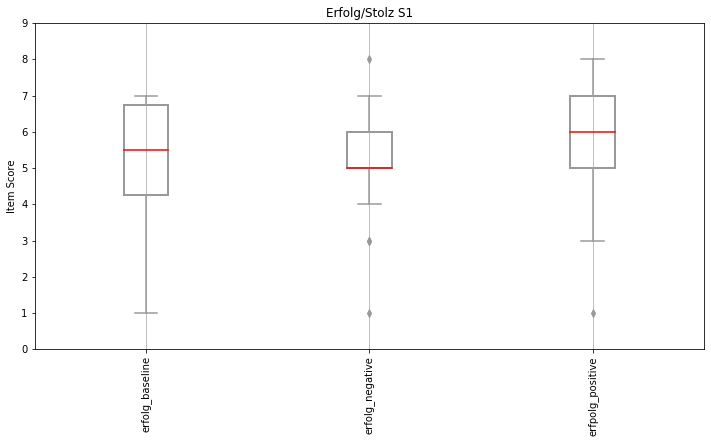

In [103]:
# Initialize figure 
f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data= erfolg_stolz, ax=ax, color='white',
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

ax.xaxis.grid(True)
ax.set(ylim=(0, 9))
ax.tick_params(axis='x', rotation=90)

ax.set(ylabel="Item Score")
ax.set_title('Erfolg/Stolz S1')

In [112]:
froehlich

frustration_baseline  frustration_negative  frustration_positive
0                      4                     4                     4
1                      1                     6                     2
2                      1                     1                     1
3                      1                     1                     1
4                      2                     2                     3
5                      1                     1                     1
6                      1                     4                     1
7                      2                     5                     3
8                      1                     2                     2
9                      2                     2                     3
10                     1                     1                     2
11                     1                     2                     1
12                     3                     1                     1
13                     1                     2                     1
14                     1                     1                     2
15                     1                     2                     1
16                     5                     3                     3
17                     1                     4                     4
18                     7                     5                     5
19                     1                     6                     4
20                     3                     3                     4
21                     1                     1                     1
22                     3                     3                     3
23                     1                     1                     4
24                     2                     3                     2
25                     2                     1                     2

In [117]:
items_sample1 = [erfolg_stolz, traurig, waerme, frustration, froehlich, peinlich, aerger, erwartung,
                 neugierig, unangenehm, entspannt]


In [99]:
items_sample2 = [erfolg_s2, stolz_s2, waerme_s2, zuneigung_s2, frustration_s2, enttaeuschung_s2,
                  aerger_s2, wut_s2, trauer_s2, niedergeschlagenheit_s2, fröhlichkeit_s2, freude_s2,
                  peinlichkeit_s2, gleichgueltig_s2, gelangweilt_s2, unangenehm_s2, negativ_s2, entspannt_s2,
                  ruhig_s2, erwartung_s2]

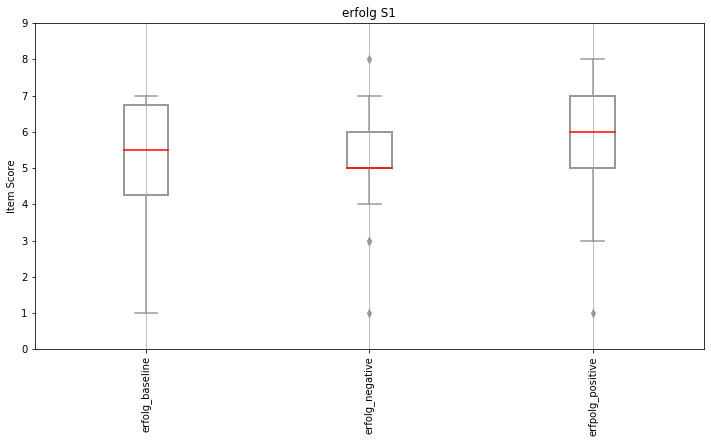

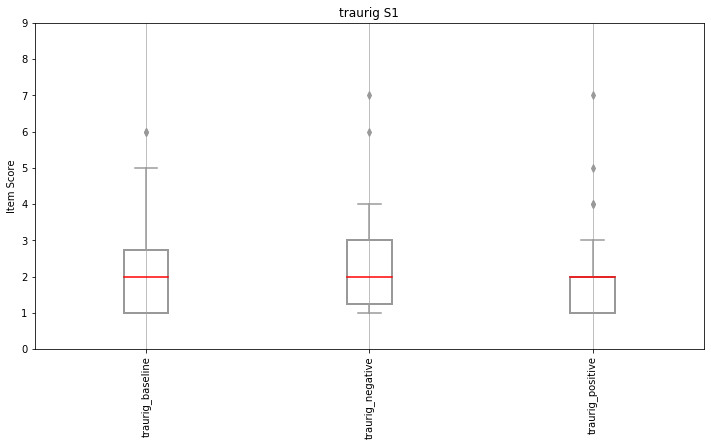

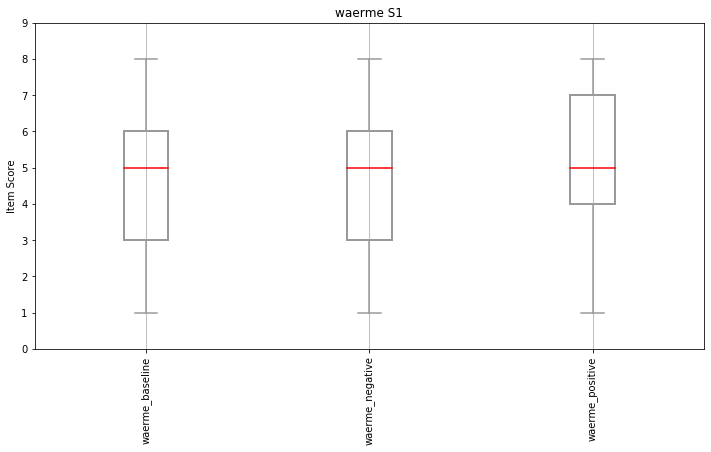

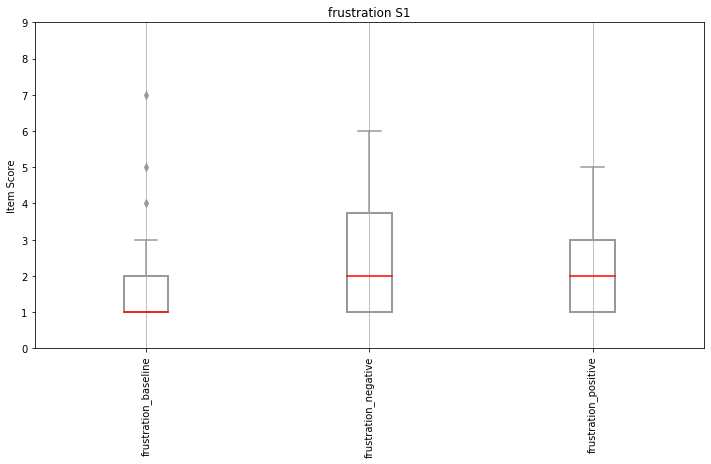

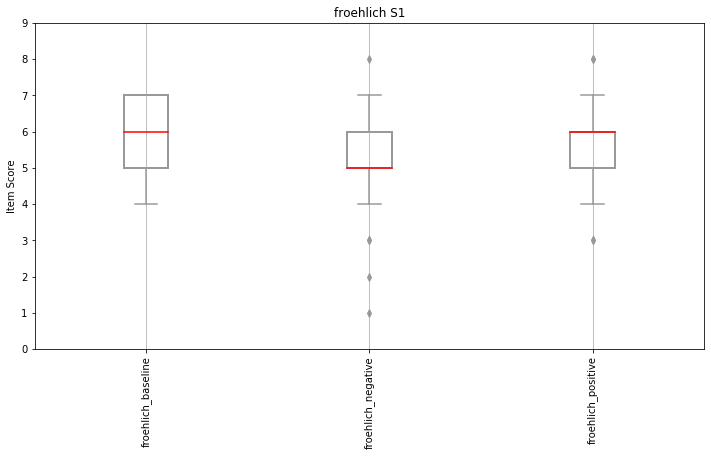

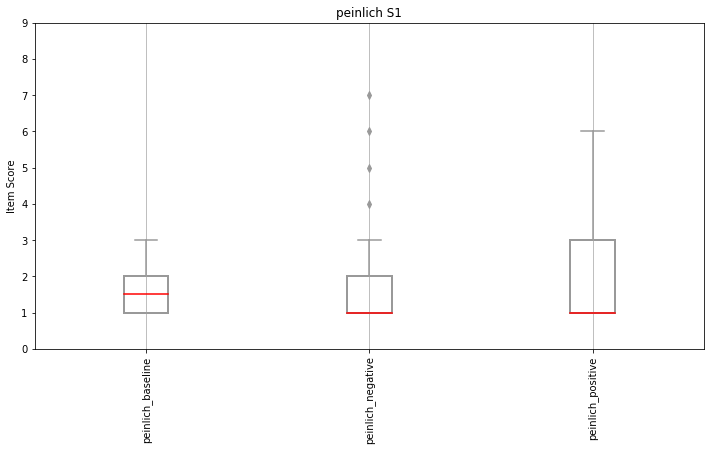

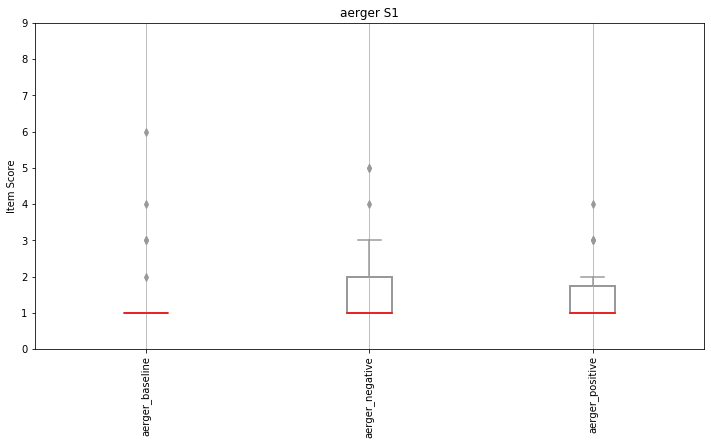

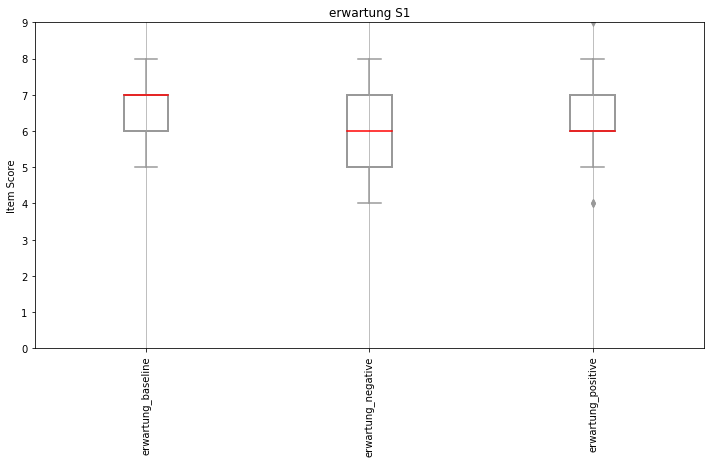

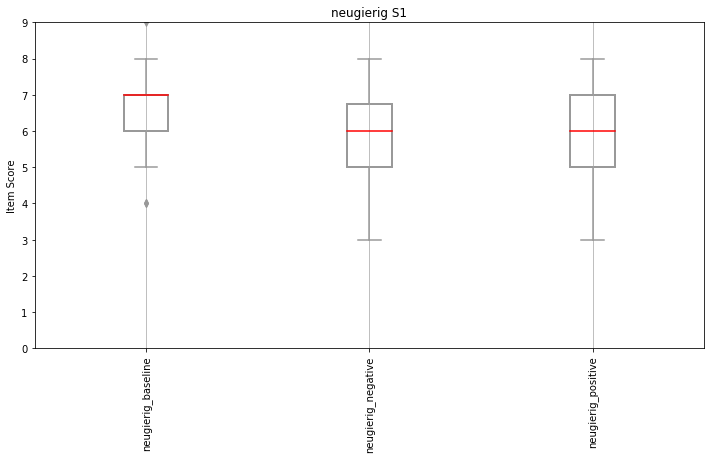

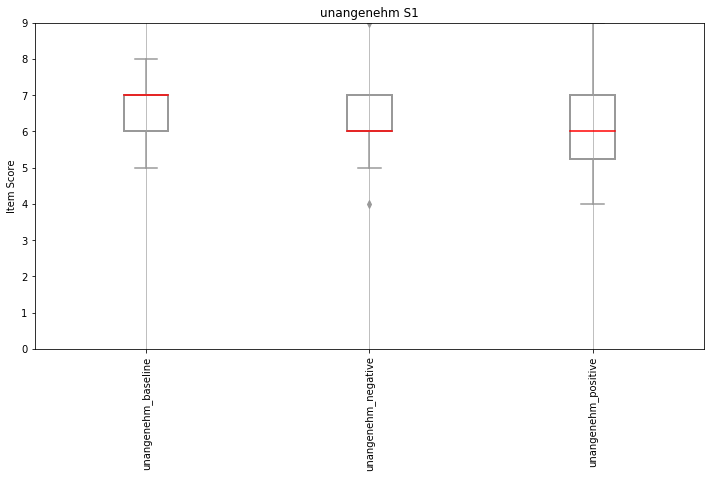

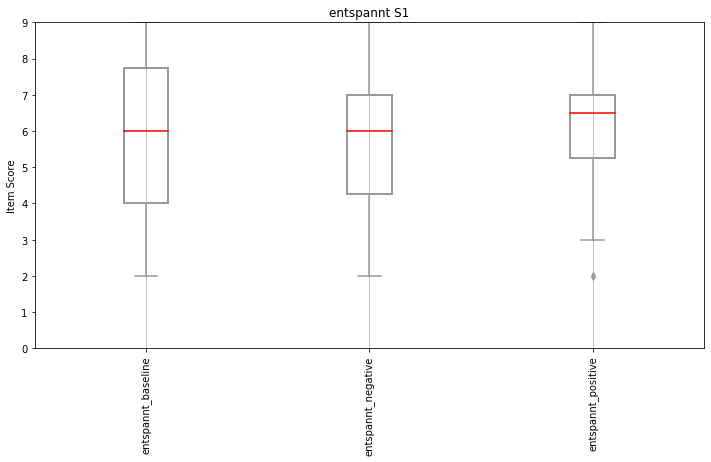

In [118]:
# Initialize figure
for i in items_sample1:
    f, ax = plt.subplots(figsize=(12, 6))

    sns.boxplot(data= i, ax=ax, color='white',
                medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

    ax.xaxis.grid(True)
    ax.set(ylim=(0, 9))
    ax.tick_params(axis='x', rotation=90)

    ax.set(ylabel="Item Score")
    ax.set_title(str(i.columns[0].split('_')[0]) + ' S1')
    f.savefig("/home/michael/master_thesis/plots/mood/" + str(i.columns[0].split('_')[0]) + ' S1'".png",
              dpi=300, bbox_inches='tight')

[Text(0, 0.5, 'Item Score')]

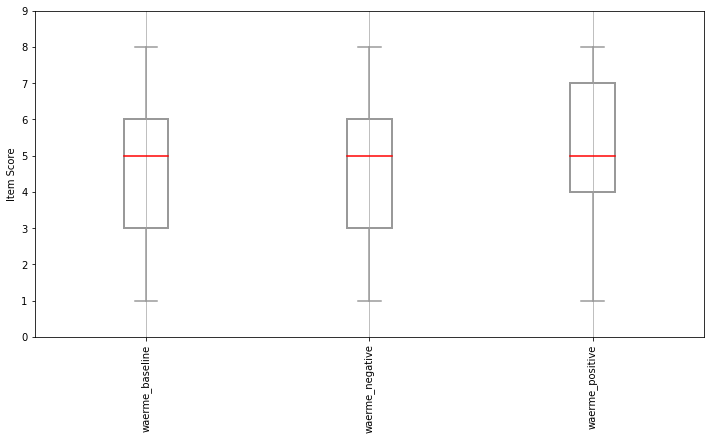

In [101]:
f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data= waerme, ax=ax, color='white',
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

ax.xaxis.grid(True)
ax.set(ylim=(0, 9))
ax.tick_params(axis='x', rotation=90)

ax.set(ylabel="Item Score")
#ax.set_title(str(i.columns[0].split('_')[0]) + ' S1')
#f.savefig("/home/michael/master_thesis/plots/mood/" + str(i.columns[0].split('_')[0]) + ' S1'".png",
#          dpi=300, bbox_inches='tight')

erfolg
stolz
waerme
zuneigung
frustration
enttaeuschung
aerger
wut
trauer
niedergeschlagenheit
fröhlichkeit
freude
peinlichkeit
gleichgueltig
gelangweilt
unangenehm
negativ
entspannt
ruhig
erwartung


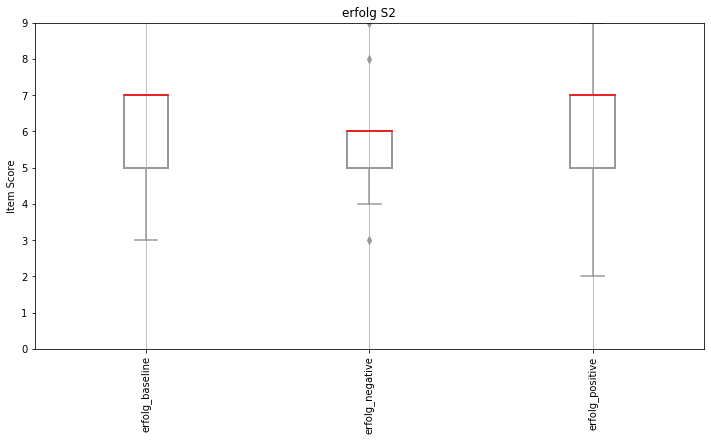

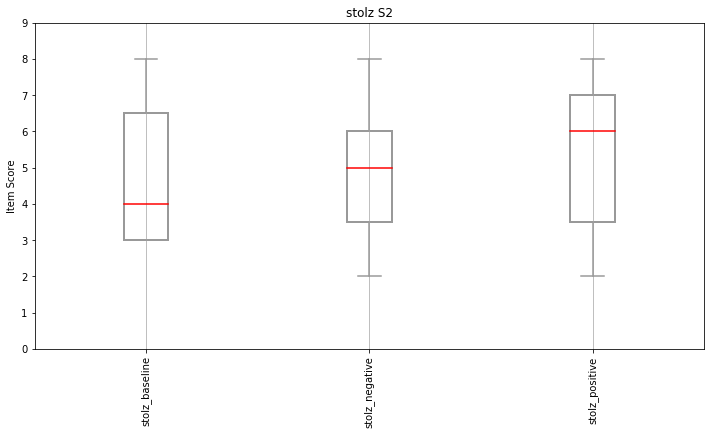

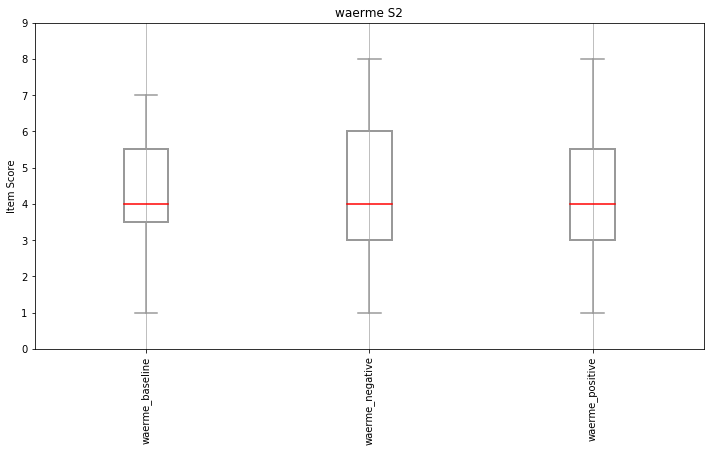

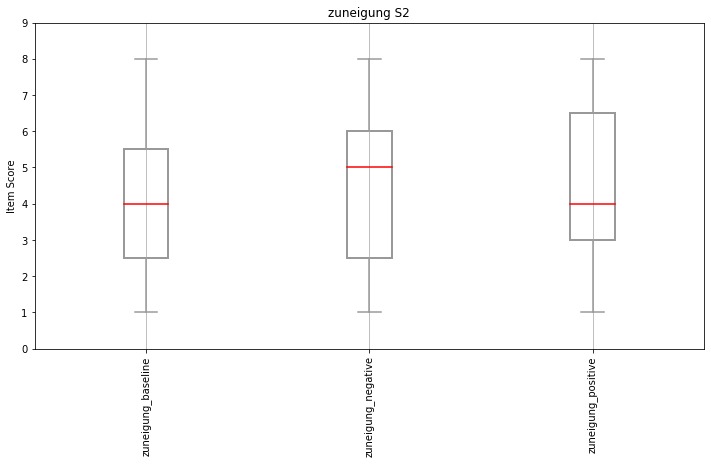

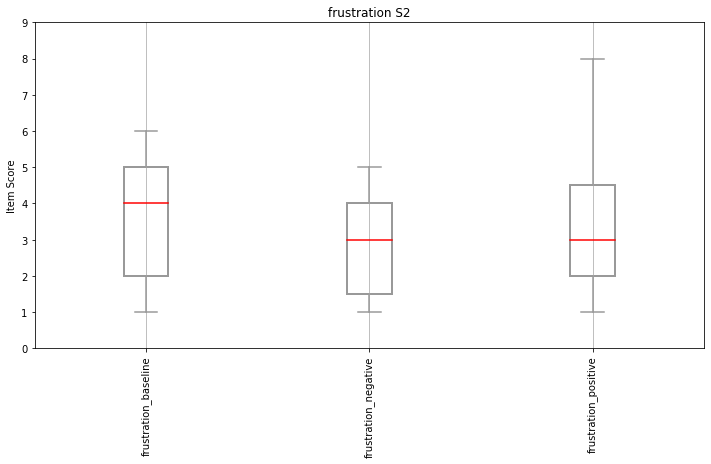

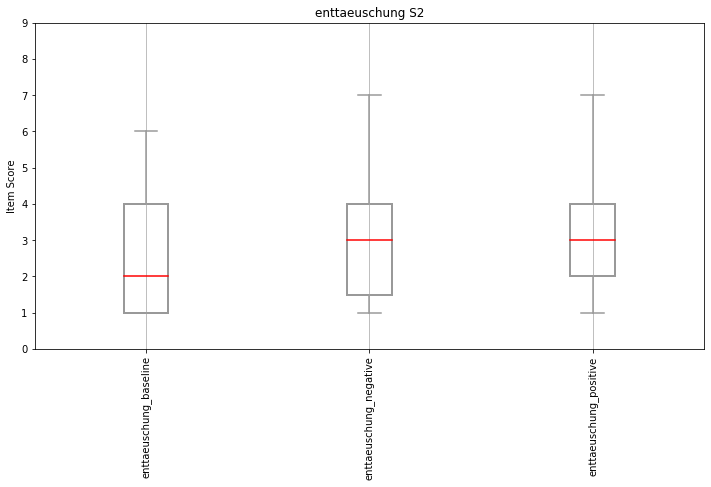

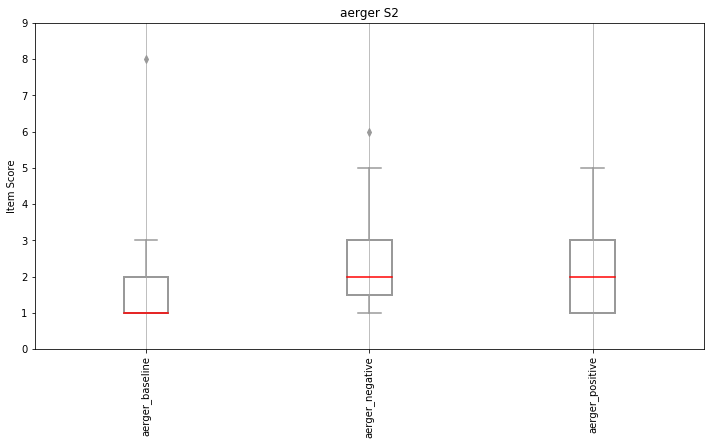

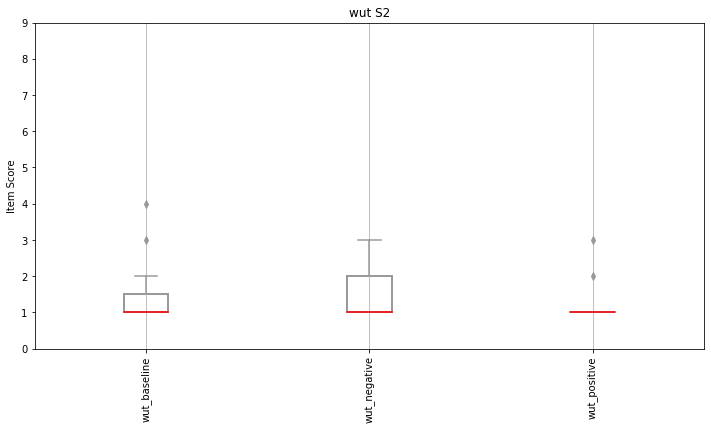

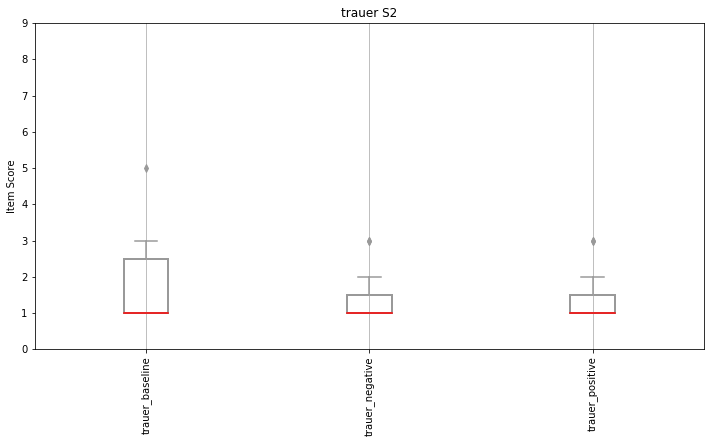

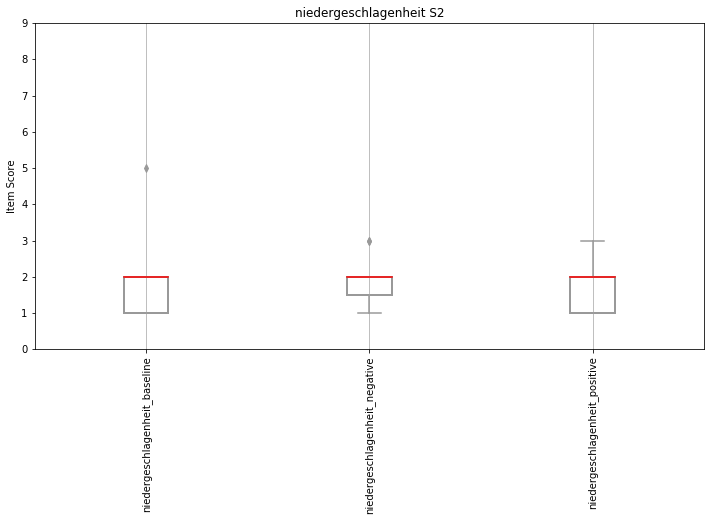

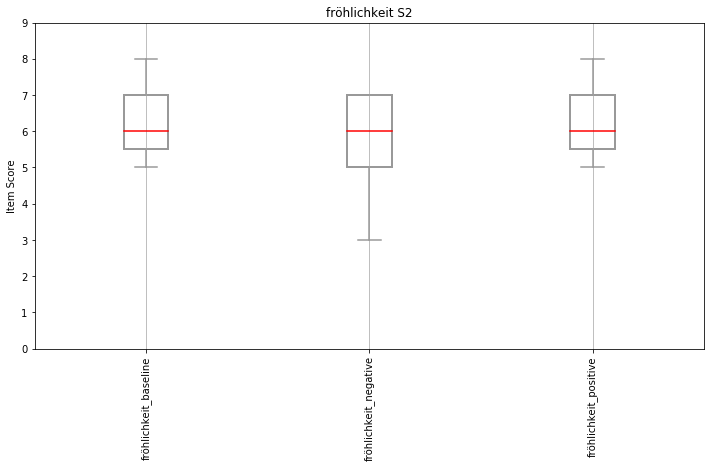

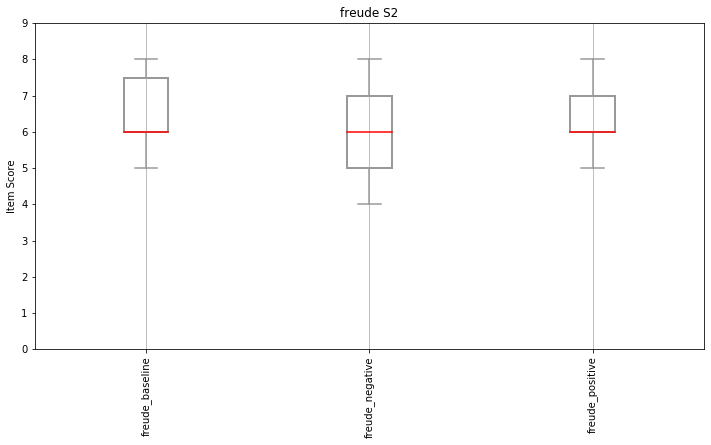

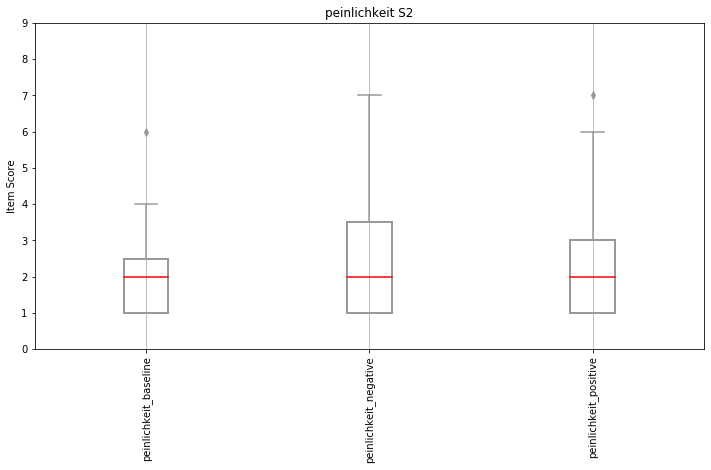

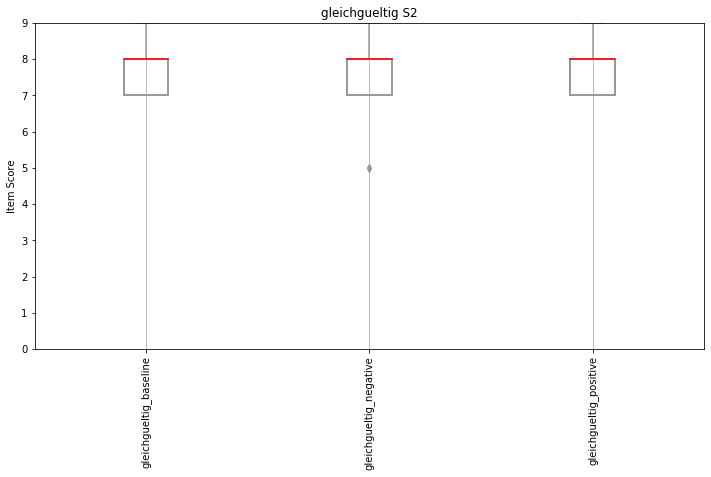

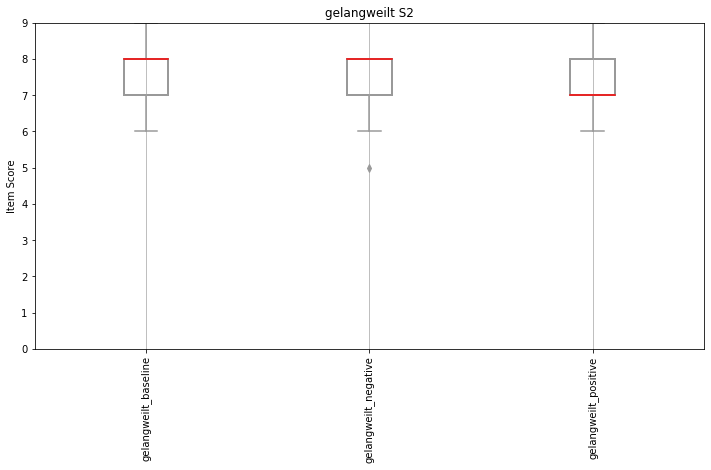

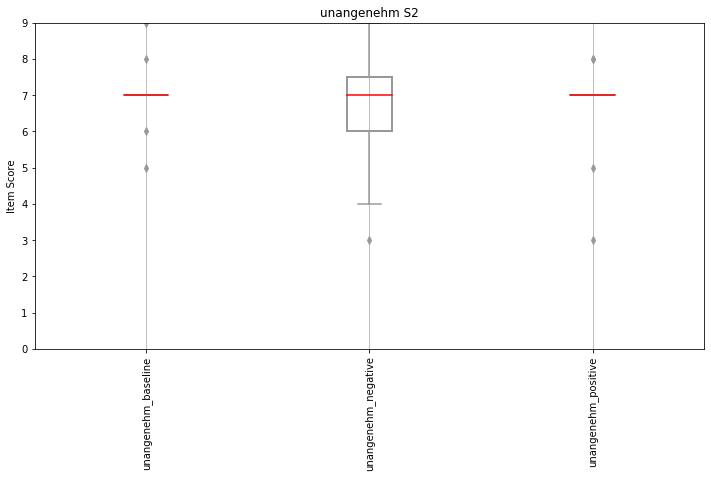

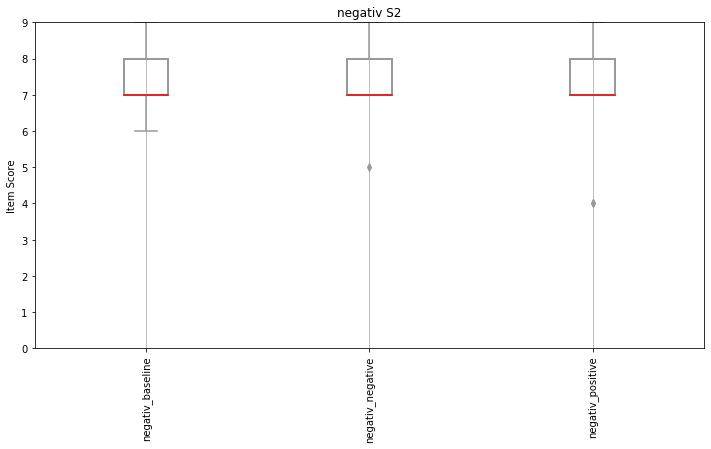

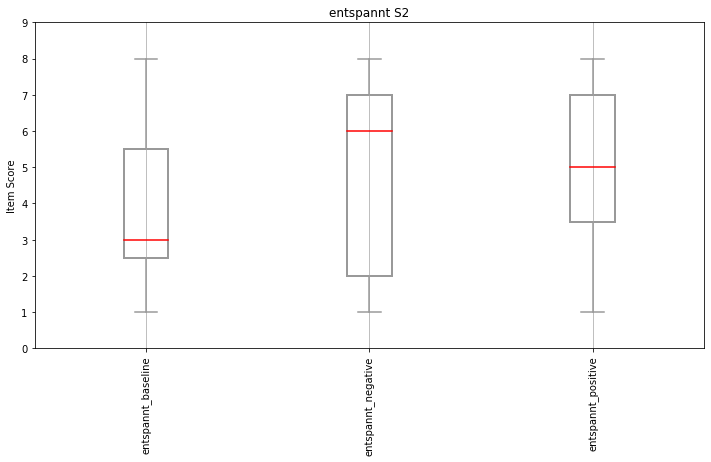

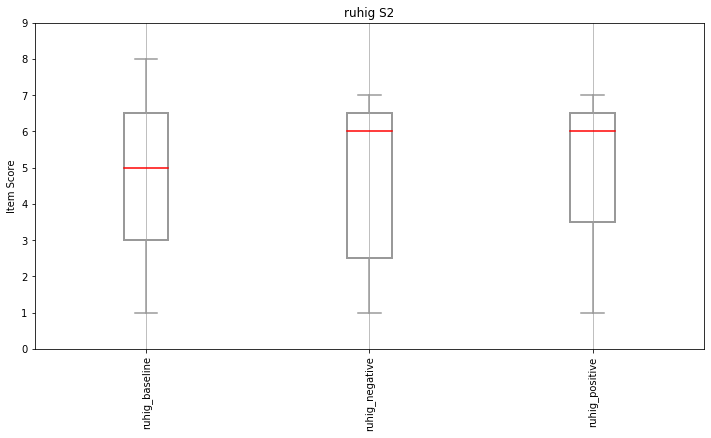

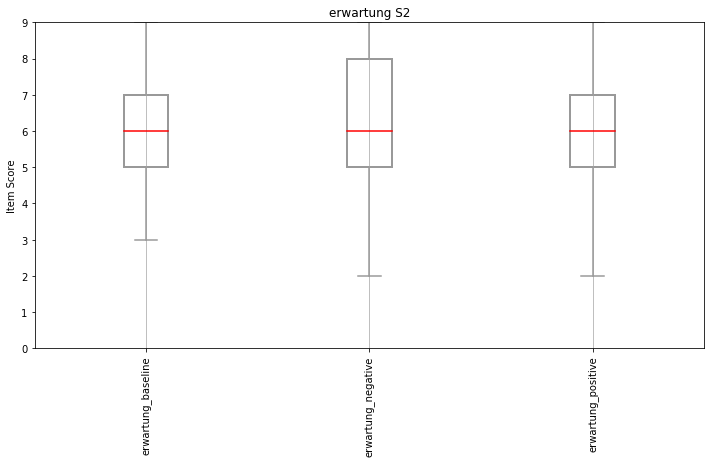

In [102]:
# Initialize figure
for i in items_sample2:
    print(str(i.columns[0].split('_')[0]))
    f, ax = plt.subplots(figsize=(12, 6))

    sns.boxplot(data= i, ax=ax, color='white',
                medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

    ax.xaxis.grid(True)
    ax.set(ylim=(0, 9))
    ax.tick_params(axis='x', rotation=90)

    ax.set(ylabel="Item Score")
    ax.set_title(str(i.columns[0].split('_')[0]) + ' S2')
    f.savefig("/home/michael/master_thesis/plots/mood/" + str(i.columns[0].split('_')[0]) + ' S2'".png",
          dpi=300, bbox_inches='tight')

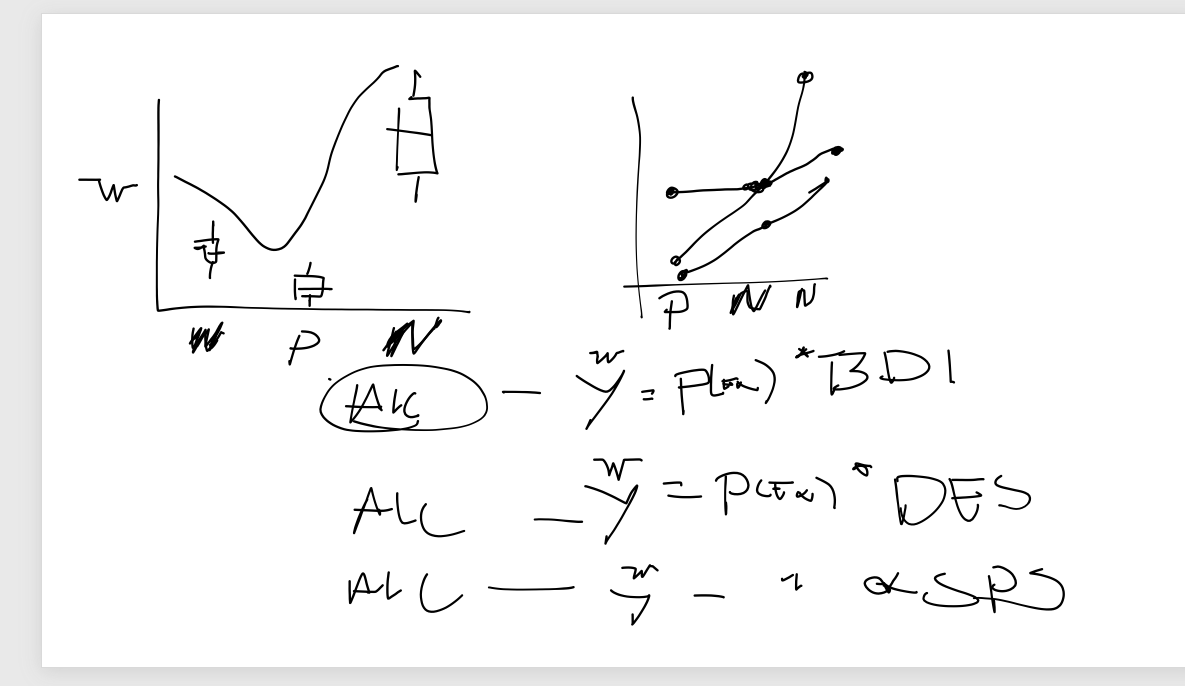